# Linear Regression

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Normal distribution

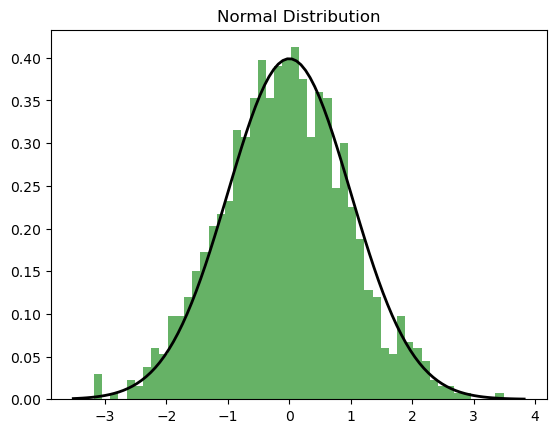

In [2]:
# Generate data for a normal distribution
mu, sigma = 0, 1  # mean and standard deviation
samples = np.random.normal(mu, sigma, 1000)

# Create a histogram to visualize the normal distribution
plt.hist(samples, bins=50, density=True, alpha=0.6, color="g")

# Plot the normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-0.5*((x - mu)/sigma)**2) / (sigma * np.sqrt(2 * np.pi))
plt.plot(x, p, "k", linewidth=2)
plt.title("Normal Distribution")
plt.show()

## Regression
### Hill climbing

In [3]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __str__(self):
        return "{0},{1}".format(self.x, self.y)
    
def plot_linear_regression(points: Point, m: float, b: float, loss: float, epoch: int):
    # Extract x and y values from points
    x_vals = [p.x for p in points]
    y_vals = [p.y for p in points]

    # Plot the points
    plt.scatter(x_vals, y_vals, color="blue", label="Data Points")

    # Plot the regression line
    regression_line = [m * x + b for x in x_vals]
    plt.plot(x_vals, regression_line, color="red", label="Regression Line")

    # Add labels and title
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Linear Regression Best fit | epoch {epoch}: m: {m:.3f}, b: {b:.3f}, Loss: {loss:.3f}")
    plt.legend()

    # Show the plot
    plt.show()

def regression_step(points, m, b, best_loss, kept_results_hc,iteration):
    # Randomly adjust "m" or "b"
    m_adjust = np.random.normal()
    b_adjust = np.random.normal()
    
    m += m_adjust
    b += b_adjust

    # Calculate loss, which is total sum squared error
    new_loss = 0.0
    for p in points:
        new_loss += (p.y - (m * p.x + b)) ** 2
    # print(f"loss: {new_loss}   |   best loss: {best_loss} => keep results, repeat process")
    # If loss has improved, keep new values. Otherwise revert.
    if new_loss < best_loss:
        print(f"\n\nepoch {iteration+1}:")
        print(f"m_adjust: {m_adjust}")
        print(f"b_adjust: {b_adjust}")
        print(f"loss: {new_loss}   |   best loss: {best_loss} => keep results, repeat process")
        print("y = {0}x + {1}\n\n".format(m, b))
        best_loss = new_loss
        kept_results_hc.append((m, b, new_loss, iteration))

        if iteration == 0 or (iteration+1 % 100) == 0:
            plot_linear_regression(points, m, b , new_loss, iteration+1)
    else:
        if (iteration+1) % 100 == 0:
            print(f"\nepoch {iteration+1}:")
            print(f"m_adjust: {m_adjust}")
            print(f"b_adjust: {b_adjust}")
            print(f"loss: {new_loss}   |   best loss: {best_loss} => do not keep results, repeat process")
        m -= m_adjust
        b -= b_adjust

    return (m, b, best_loss, kept_results_hc)

# Load the data
points = [(Point(row.x, row.y)) for index, row in pd.read_csv("linreg_data.txt").iterrows()]



epoch 1:
m_adjust: -0.30893008097872643
b_adjust: 0.41151622056365667
loss: 2980.9047866183173   |   best loss: 10000000000000.0 => keep results, repeat process
y = -0.20893008097872642x + 0.5115162205636566




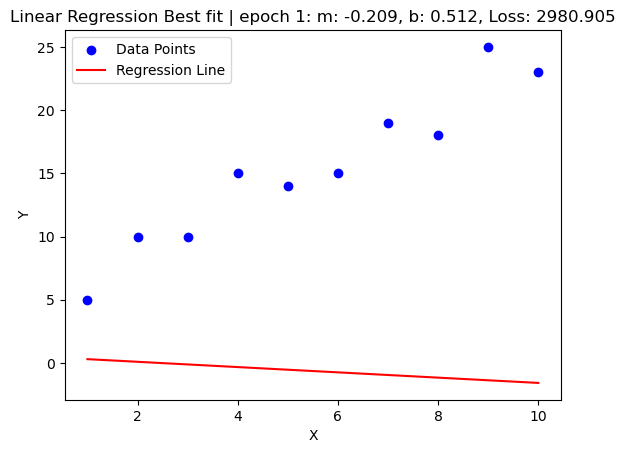



epoch 3:
m_adjust: 0.09226868878214792
b_adjust: 1.211066656708107
loss: 2427.207758510147   |   best loss: 2980.9047866183173 => keep results, repeat process
y = -0.11666139219657853x + 1.7225828772717637




epoch 5:
m_adjust: 0.38387106806254345
b_adjust: -0.751300426679146
loss: 1938.156970766811   |   best loss: 2427.207758510147 => keep results, repeat process
y = 0.2672096758659649x + 0.9712824505926178




epoch 6:
m_adjust: 0.3562923792646069
b_adjust: -0.03866443919735958
loss: 1389.3526970618557   |   best loss: 1938.156970766811 => keep results, repeat process
y = 0.6235020551305718x + 0.9326180113952581




epoch 7:
m_adjust: 0.6267690429491348
b_adjust: -0.7738325286897385
loss: 766.9614072666715   |   best loss: 1389.3526970618557 => keep results, repeat process
y = 1.2502710980797067x + 0.15878548270551962




epoch 9:
m_adjust: 0.749010699115524
b_adjust: 1.3561716089163733
loss: 111.85566744261331   |   best loss: 766.9614072666715 => keep results, repeat process
y 

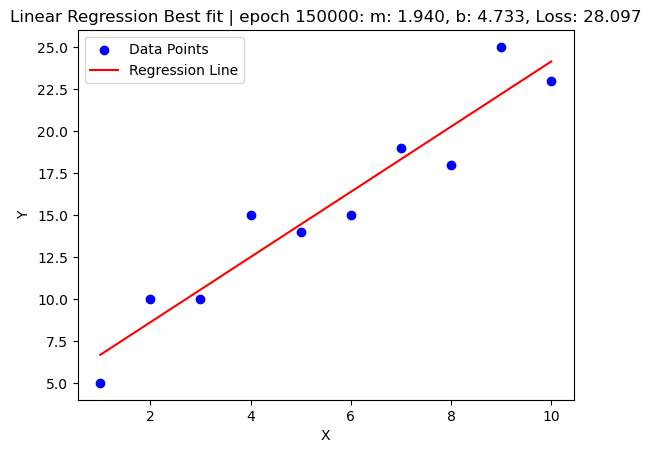

In [4]:
# Building the model
# m = 1.9400453587449547
# b = 4.734786614108385
m = 0.1  # Slope
b = 0.1  # Y-intercept

epochs = 150000  # The number of iterations to perform

n = float(len(points))  # Number of points

best_loss = 10000000000000.0  # Initialize with a really large value

kept_results_hc = [(m, b, best_loss, 0)] # Store the results which lead to a lower loss (for visualization)

for i in range(epochs):
    m, b, best_loss, kept_results_hc = regression_step(points, m, b, best_loss, kept_results_hc, i)

print(f"y = {m}x + {b}")
plot_linear_regression(points, kept_results_hc[-1][0], kept_results_hc[-1][1], kept_results_hc[-1][2], epochs)


In [5]:
# for m, b, loss in kept_results:
#     plot_linear_regression(points, m, b, loss)

### Gradient Descent

$$
\hat{y}_i=m \cdot x_i + b \\

L(x,m,b) = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 \\
L(x,m,b) = \sum_{i=1}^{n}(y_i - (m \cdot x_i + b))^2 \\ \\ \\

\frac{\delta L(x,m,b)}{\delta m} = \sum_{i=1}^{n}2 \cdot(y_i - (m \cdot x_i + b)) \cdot -x_i \\
\frac{\delta L(x,m,b)}{\delta m} = -2 \cdot \sum_{i=1}^{n}(y_i - \hat{y_i}) \cdot (x_i) \\
\frac{\delta L(x,m,b)}{\delta m} = 2 \cdot \sum_{i=1}^{n}(\hat{y_i} - y_i) \cdot (x_i) \\
\frac{\delta L(x,m,b)}{\delta b} = -2 \cdot \sum_{i=1}^{n}(y_i - \hat{y_i}) \cdot (1) \\
\frac{\delta L(x,m,b)}{\delta b} = 2 \cdot \sum_{i=1}^{n}(\hat{y_i} - y_i) \\

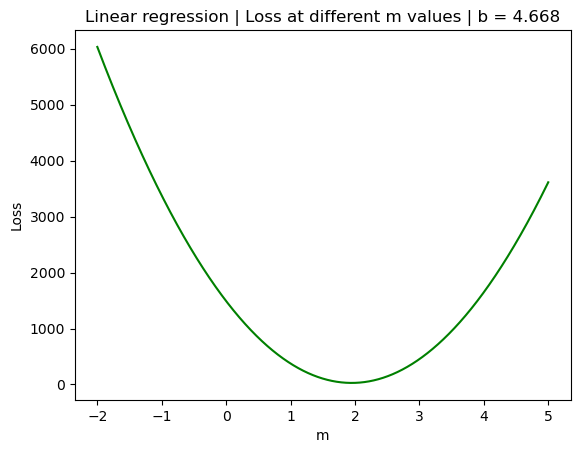

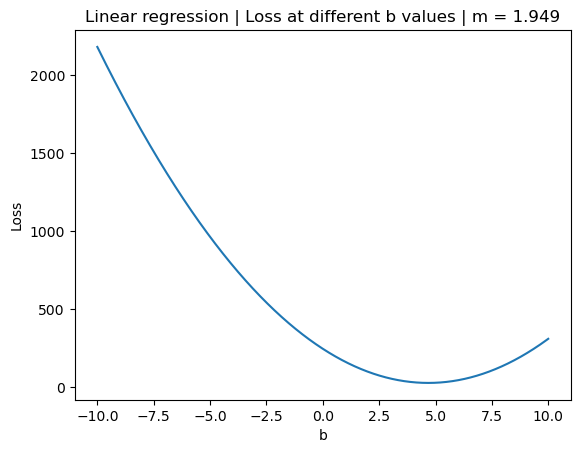

In [ ]:
def plot_loss_by_b(points, m):
    b = np.linspace(-10,10,10000)

    loss = 0.0
    for p in points:
        loss += (p.y - (m * p.x + b)) ** 2

    plt.figure()
    plt.plot(b,loss)
    plt.title(f"Linear regression | Loss at different b values | m = {m}")
    plt.xlabel("b")
    plt.ylabel("Loss")
    plt.show()

def plot_loss_by_m(points, b, example_m=None, loss_gradient=None):
    m = np.linspace(-2,5,10000)

    loss = 0.0
    for p in points:
        loss += (p.y - (m * p.x + b)) ** 2

    plt.figure()
    plt.plot(m, loss, color="green")
    if example_m is not None:
        ex_loss = 0.0
        for p in points:
            ex_loss += (p.y - (example_m * p.x + b)) ** 2
        plt.scatter(example_m, ex_loss, marker="x", color="red", s=150)
        if loss_gradient is not None:
            plt.title(f"Linear regression | Loss at different m values | b = {b} | m = {example_m} | grad = {loss_gradient} | loss = {ex_loss:.3f}")
        else:
            plt.title(f"Linear regression | Loss at different m values | b = {b} | m = {example_m} | loss = {ex_loss:.3f}")
    else:
        plt.title(f"Linear regression | Loss at different m values | b = {b}")
    plt.xlabel("m")
    plt.ylabel("Loss")
    plt.show()

def loss_gradient_m(xs,ys,m,b):
    # grad = -2 * np.sum((y-(m*x+b))*x)
    grad = 2 * np.sum(((m*np.array(xs)+b)-np.array(ys))*np.array(xs))/len(xs)
    return grad

def loss_gradient_b(xs,ys,m,b):
    # grad = -2 * np.sum(y-(m*x+b))
    grad = 2 * np.sum(((m*np.array(xs)+b)-np.array(ys)))/len(xs)
    return grad

def calc_loss(xs,ys,m,b):
    loss = np.sum((np.array(ys) - (np.array(xs)*m+b))**2)
    return loss

def regression_step_gd(xs, ys, m, b, best_loss, kept_results_gd):
    # Randomly adjust "m" or "b"
    m_adjust = loss_gradient_m(xs,ys,m,b)
    b_adjust = loss_gradient_b(xs,ys,m,b)

    # print(f"m_adjust: {m_adjust}")
    # print(f"b_adjust: {b_adjust}")
    
    m -= (learning_rate * m_adjust)
    b -= (learning_rate * b_adjust)

    new_loss = calc_loss(xs, ys, m , b)

    # If loss has improved, keep new values. Otherwise revert.
    if new_loss < best_loss:
        best_loss = new_loss
        kept_results_gd.append((m, b, new_loss, i))
        if ((i+1) % 100 == 0) or (i == 0) or (i < 20):
            print(f"\n\nepoch {i+1}:")
            print(f"m: {m} | m_adjust: {m_adjust}")
            print(f"b: {b} | b_adjust: {b_adjust}")
            print(f"loss: {new_loss}   |   best loss: {best_loss} => keep results, repeat process")
            print("y = {0}x + {1}\n\n".format(m, b))
            plot_linear_regression(points,m,b,new_loss,i+1)
    elif (i+1) % 100 == 0:
        print(f"\n\nepoch {i+1}:")

    return (m, b, best_loss, kept_results_gd)

points = [(Point(row.x, row.y)) for index, row in pd.read_csv("linreg_data.txt").iterrows()]

m = 0.01
b = 0.01
epochs = 2000  # The number of iterations to perform
learning_rate = 0.001

n = float(len(points))  # Number of points

best_loss = 10000000000000.0  # Initialize with a really large value

kept_results_gd = [(m, b, best_loss, 0)] # Store the results which lead to a lower loss (for visualization)

xs = [p.x for p in points]
ys = [p.y for p in points]

# m = 1.949
# b = 4.668
plot_loss_by_m(points, 4.668)
plot_loss_by_b(points, 1.949)

#### Plot loss by parameters (2D)
$$
L(x, y, m, b) = (y - (mx +b))^2 
$$

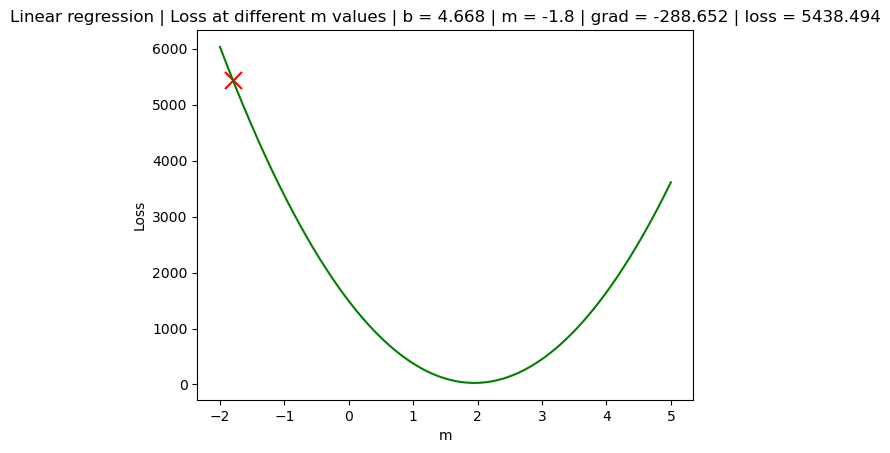

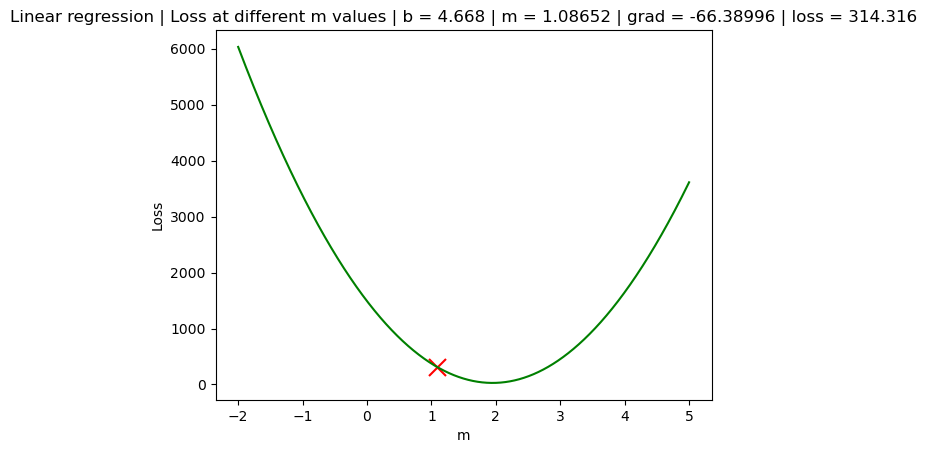

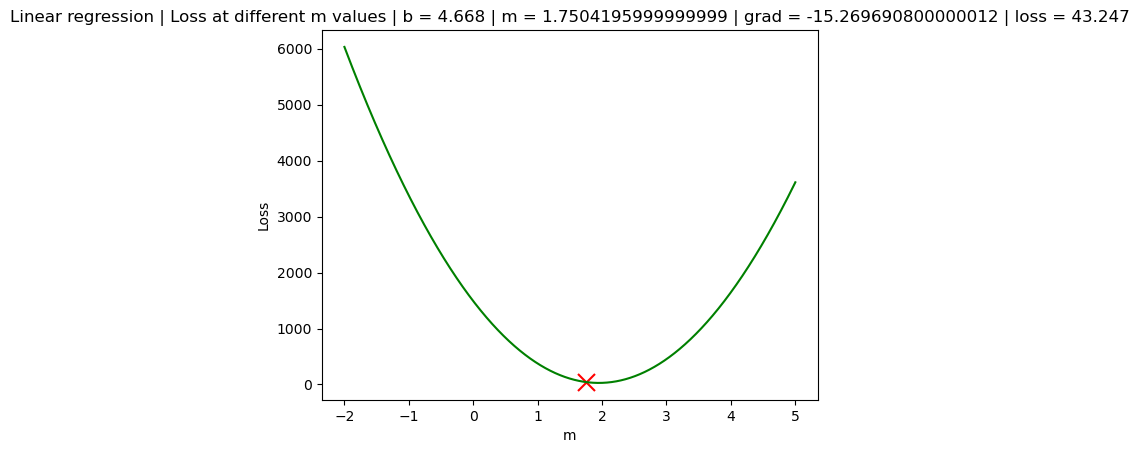

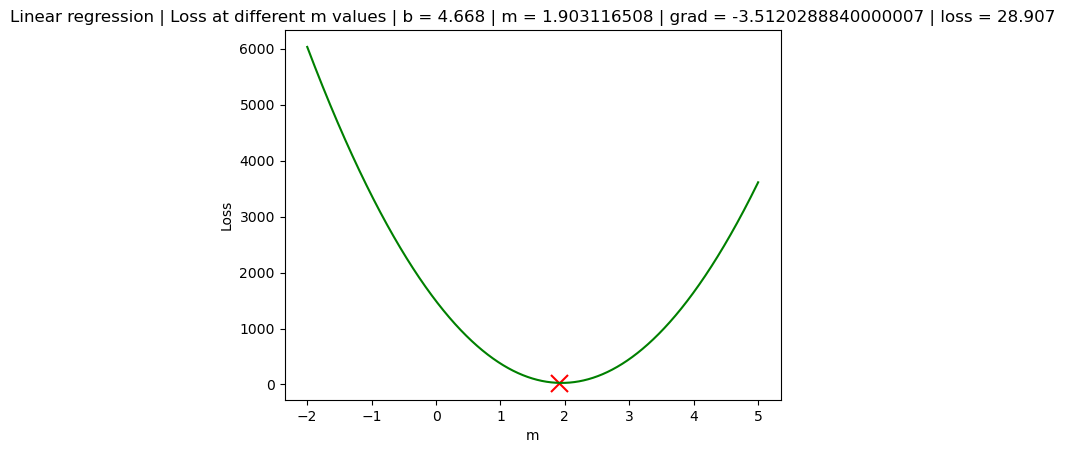

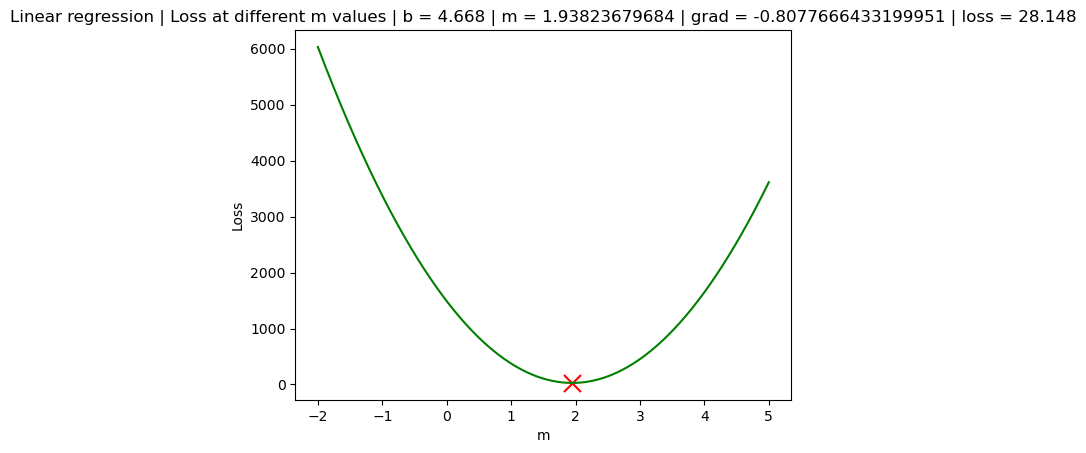

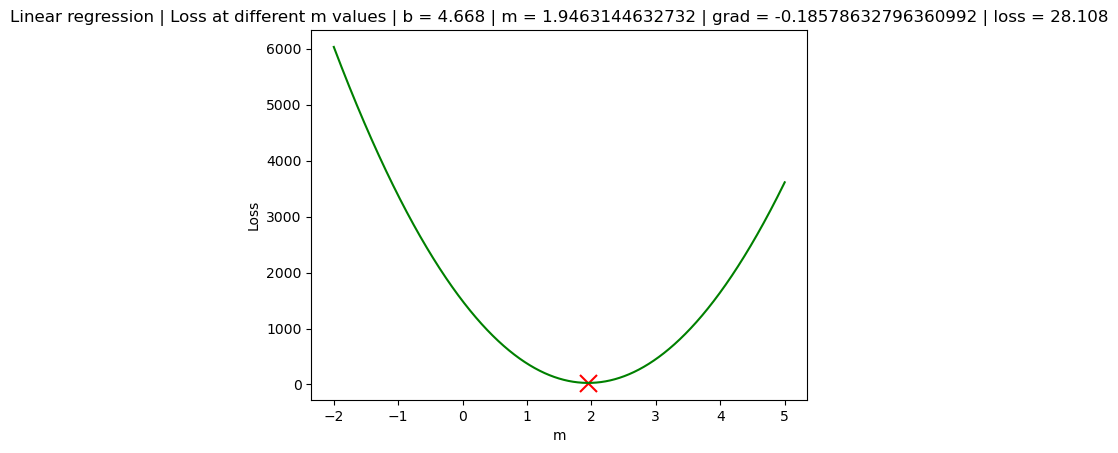

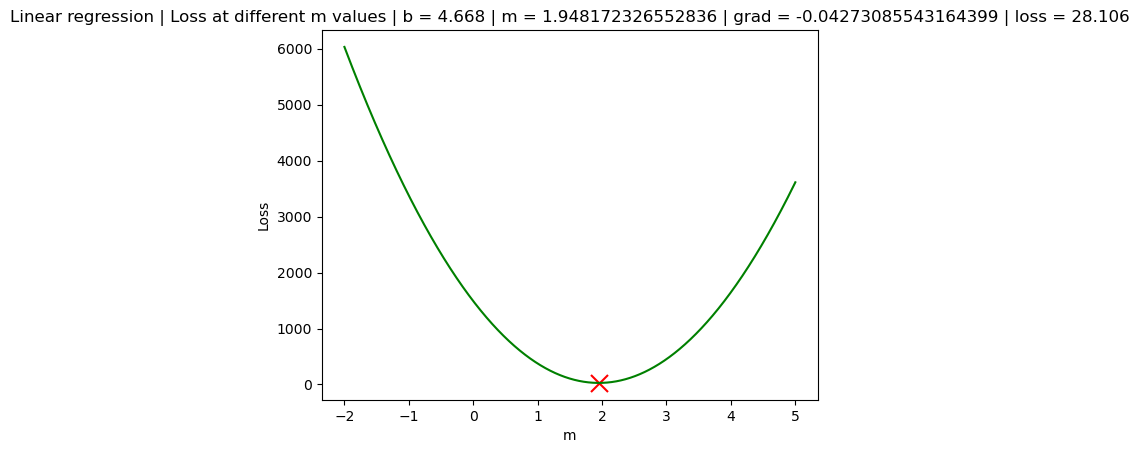

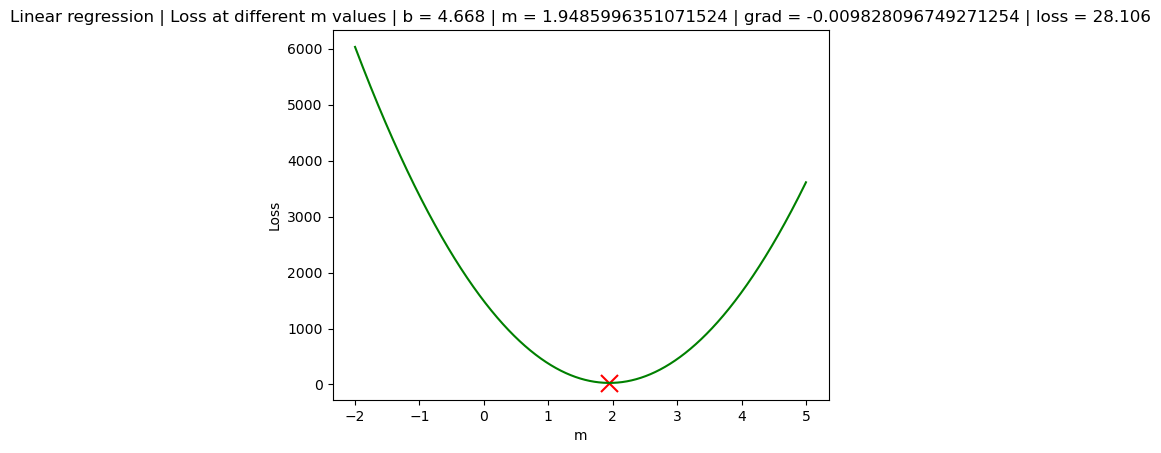

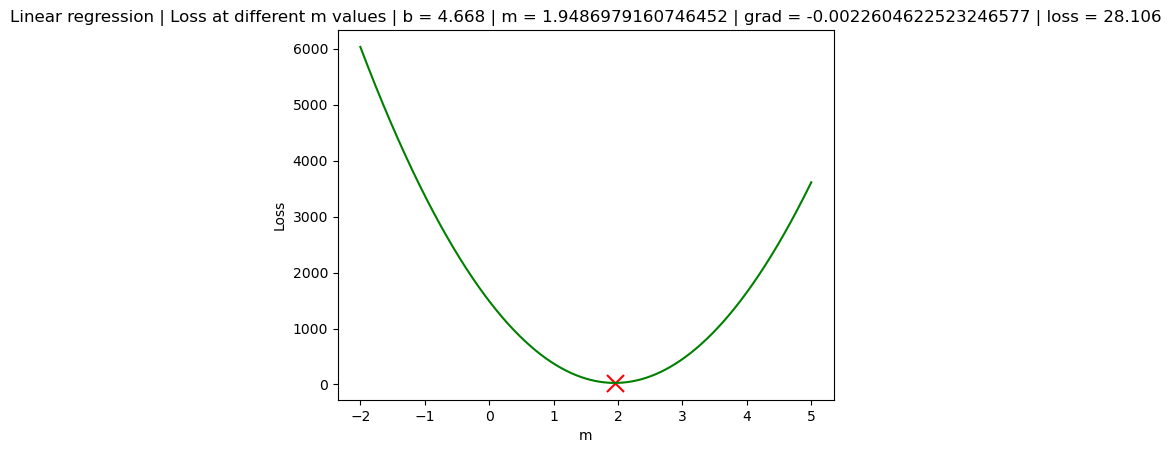

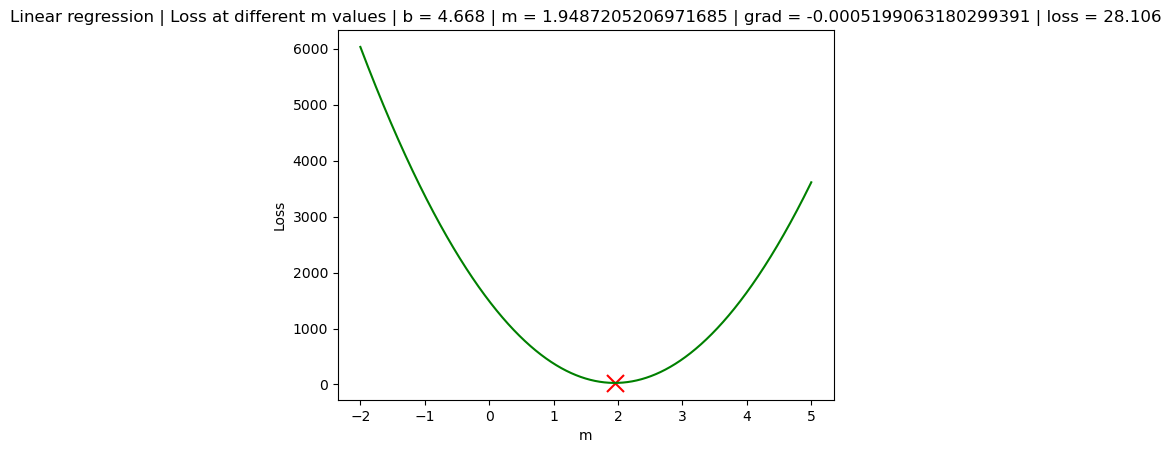

In [7]:
alpha = 0.01
example_m = -1.8
example_b = 4.668

ex_epochs = 10

for i in range(ex_epochs):
    loss_grad = loss_gradient_m(xs, ys, example_m, example_b)
    plot_loss_by_m(points, example_b, example_m, loss_grad)
    example_m -= alpha * loss_grad


#### Plot loss by parameters (3D)

In [8]:
def plot_loss_by_parameters_3d(xs, ys, losses_m_b, m_example=None, b_example=None, grad_m=None, grad_b=None, epoch=None, example_coords_history=None):
    m_values, b_values, loss_values = zip(*losses_m_b)
    
    fig = plt.figure()
    ax = fig.gca(projection="3d")
    ax.set_xlabel("m")
    ax.set_ylabel("b")
    ax.set_zlabel("loss")

    surf = ax.plot_trisurf(m_values, b_values, loss_values, cmap="jet", alpha=0.5)
    fig.colorbar(surf, shrink=0.5, aspect=5)

    if m_example is not None and b_example is not None:
        ax.scatter(m_example, b_example, calc_loss(xs, ys, m_example, b_example), s=75, marker="x", color="red")

    if example_coords_history is not None:
        m_ex_vals, b_ex_vals, loss_ex_vals = zip(*example_coords_history)
        ax.scatter(m_ex_vals, b_ex_vals, loss_ex_vals, s=50, marker="x", color="red")
    
    if epoch is not None:
        plt.title(f"MSE loss surface | epoch {epoch} | m: {example_m:.3f} | b: {example_b:.3f}")
        if grad_m is not None and grad_b is not None:
            plt.title(f"MSE loss surface | epoch {epoch} | m: {example_m:.3f}, grad_m: {grad_m:.3f} | b: {example_b:.3f}, grad_b: {grad_b:.3f} ")
    else:
        plt.title(f"MSE loss surface | m: {example_m:.3f} | b: {example_b:.3f}")

    plt.show()

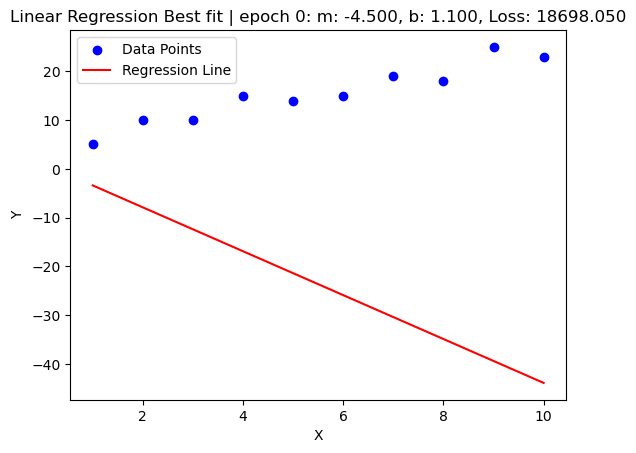

C:\Users\WHK\AppData\Local\Temp\ipykernel_11940\2860910855.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


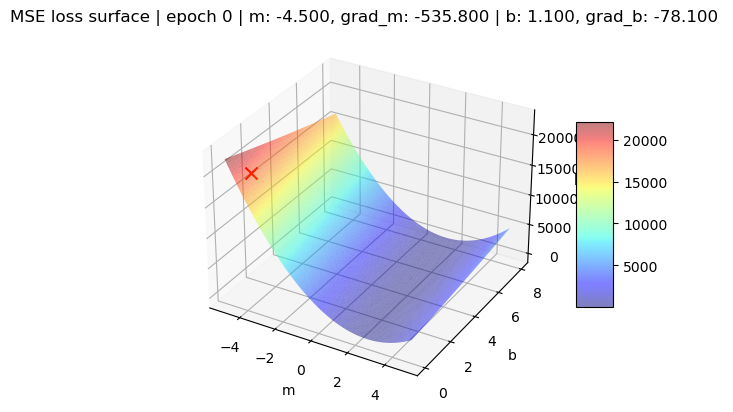

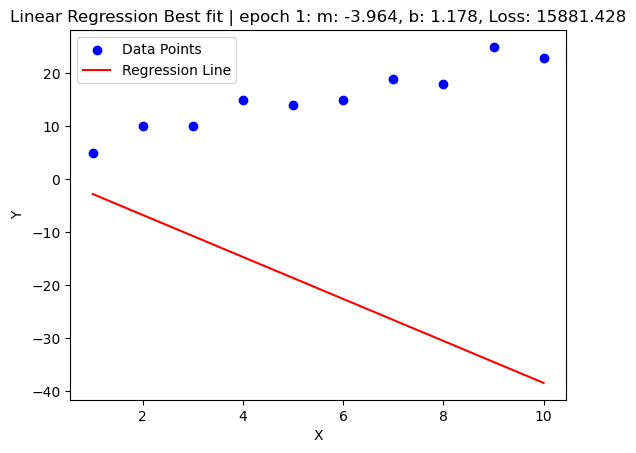

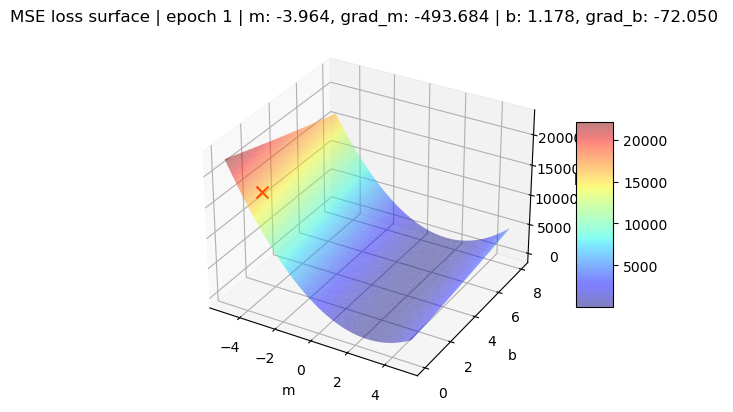

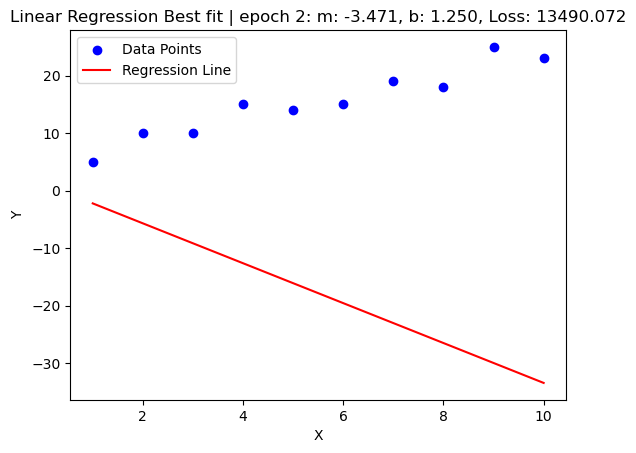

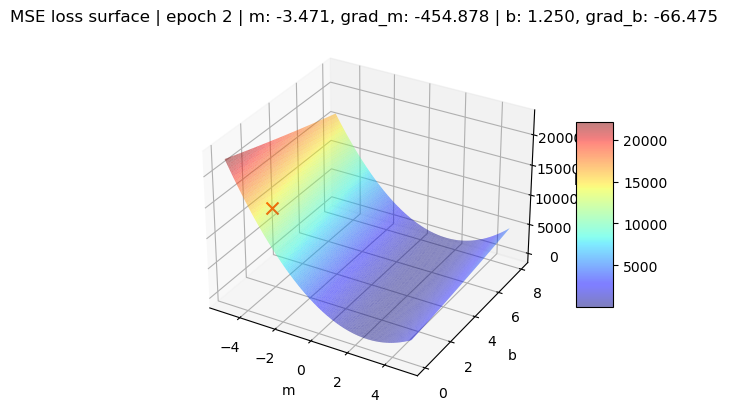

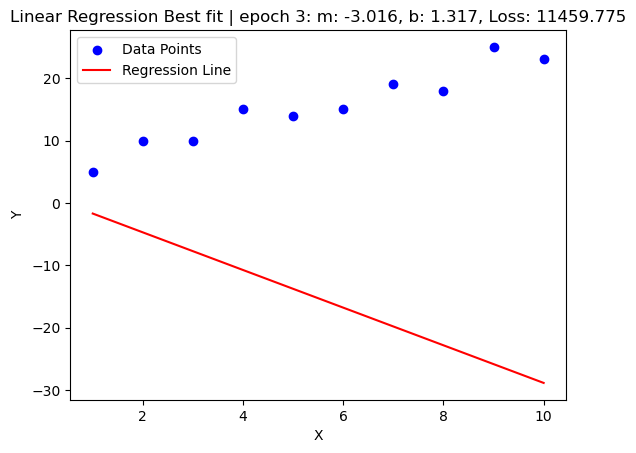

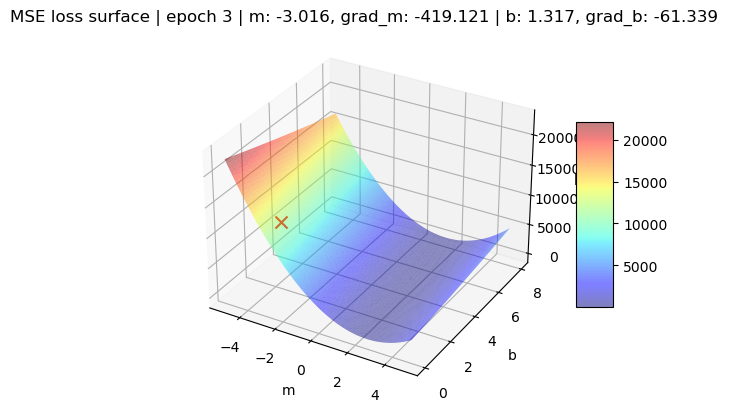

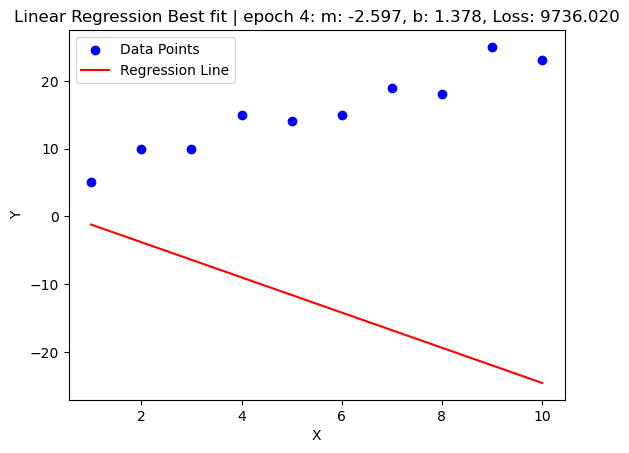

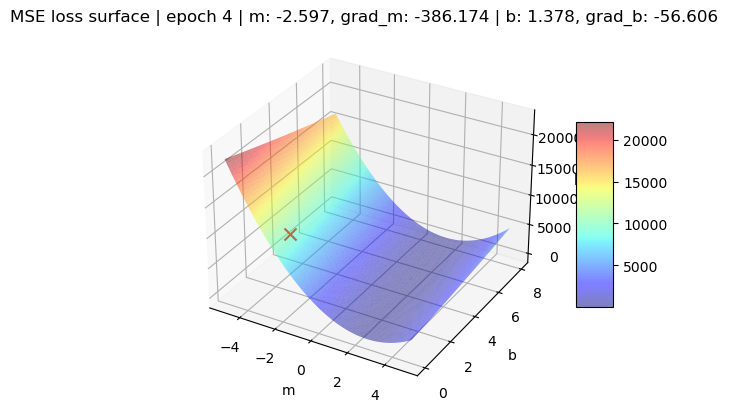

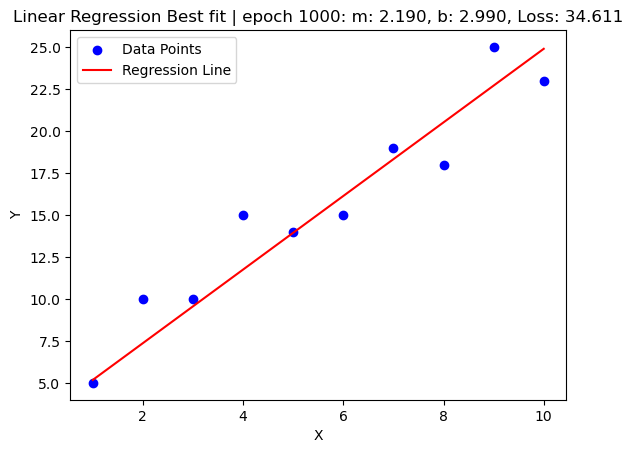

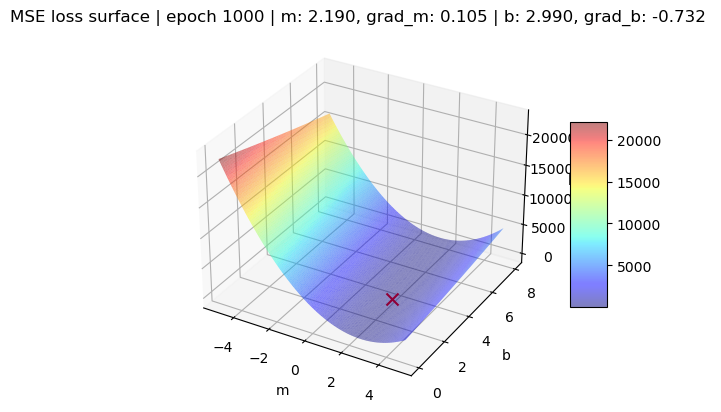

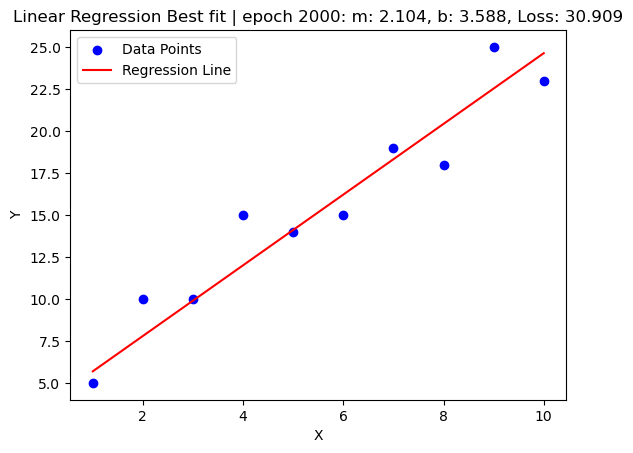

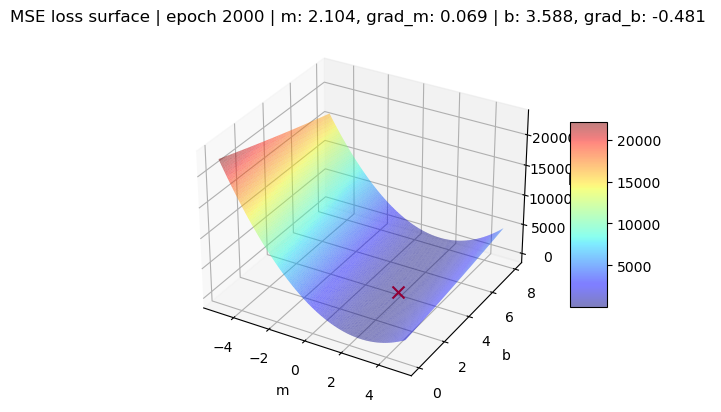

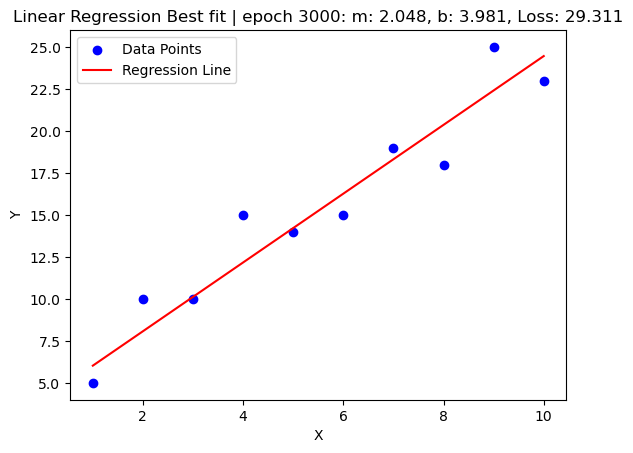

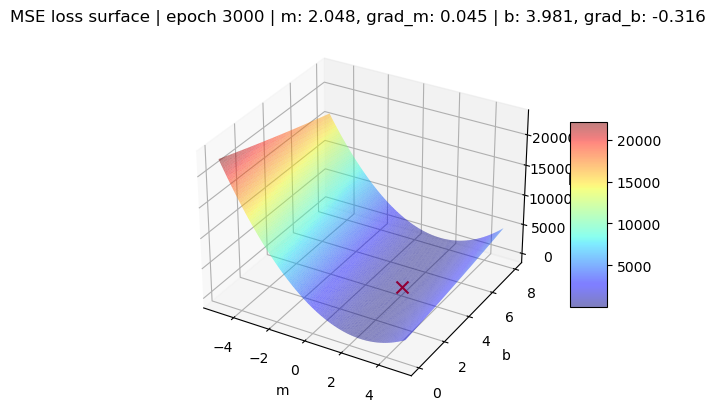

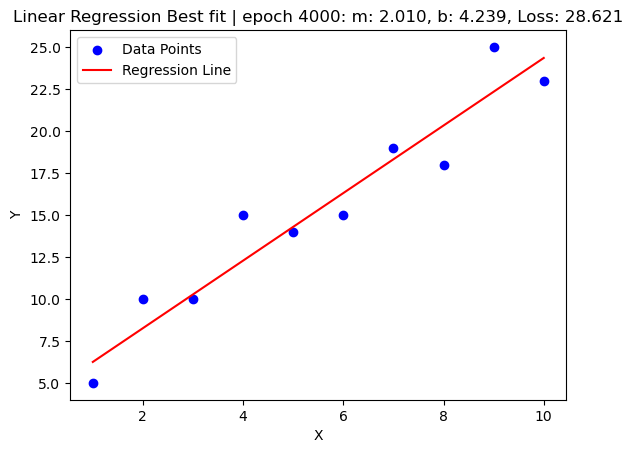

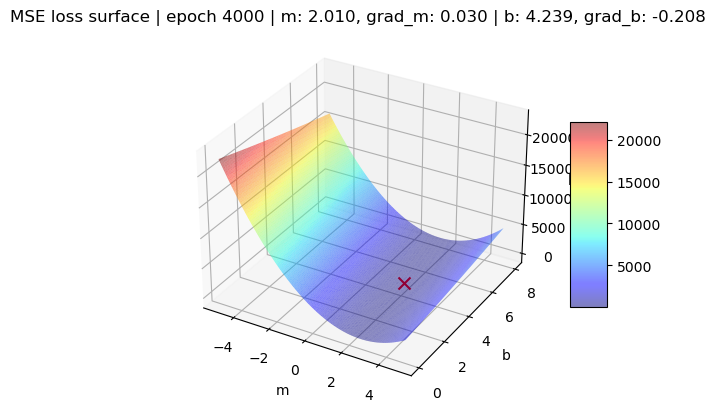

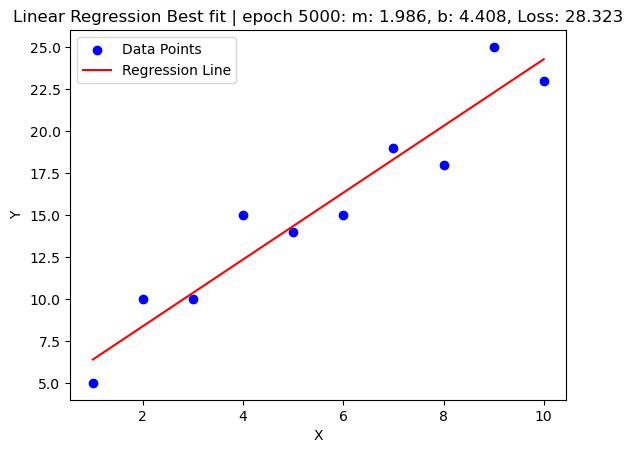

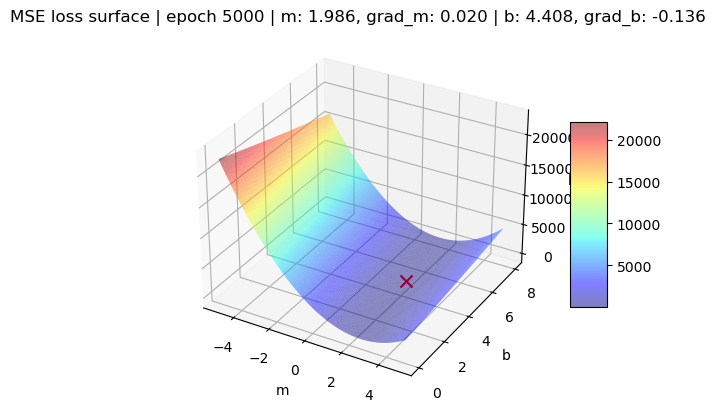

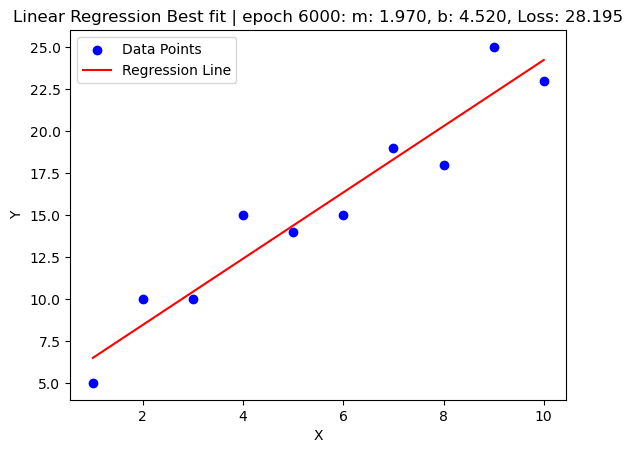

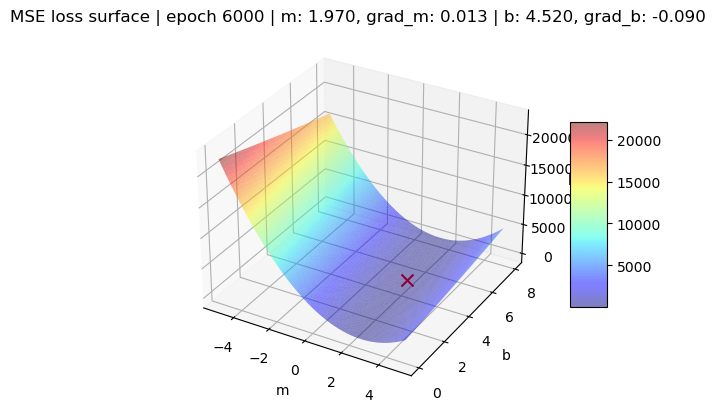

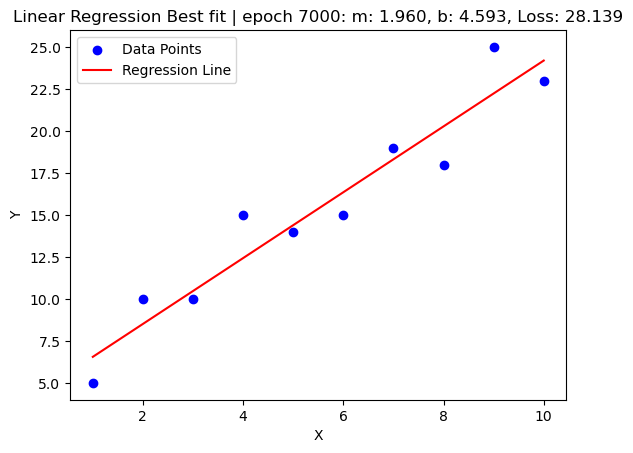

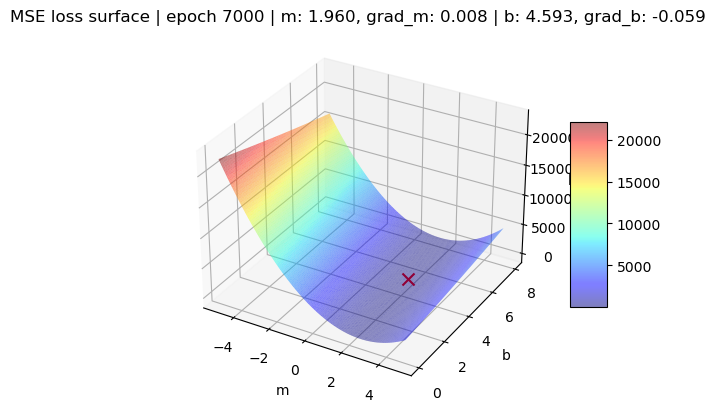

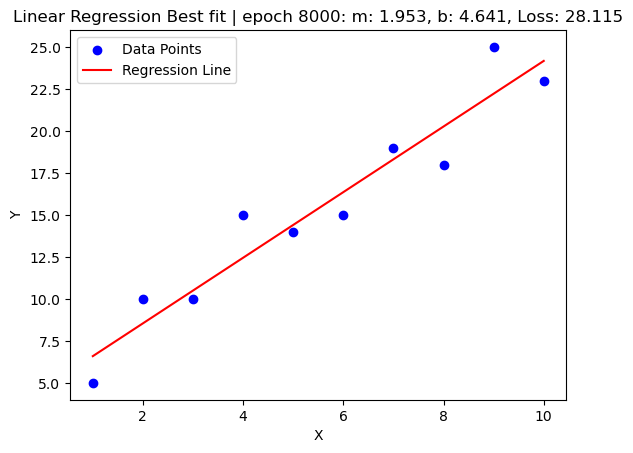

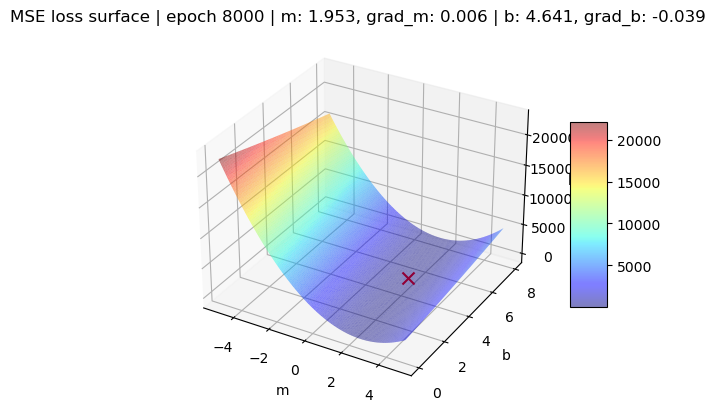

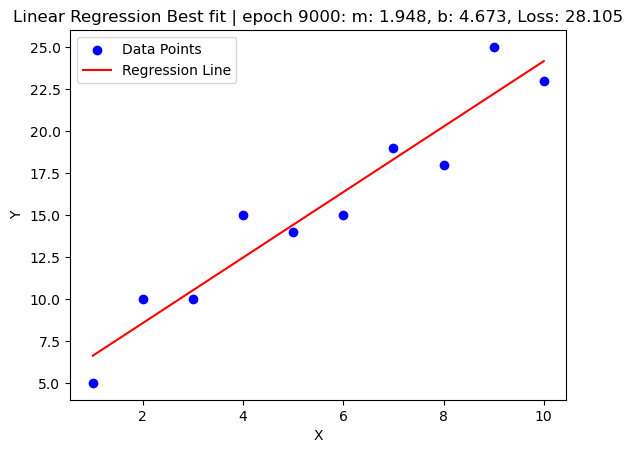

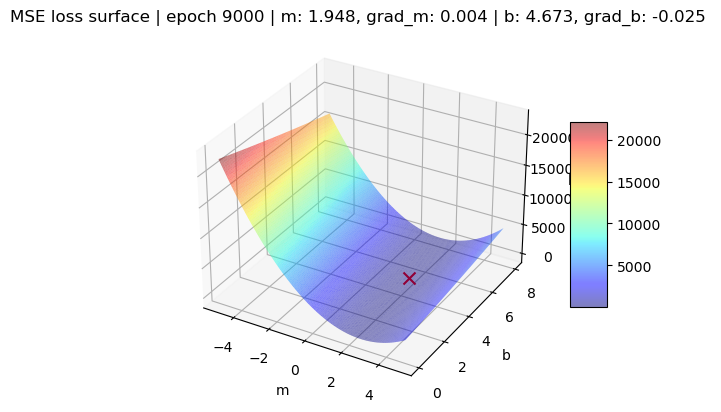

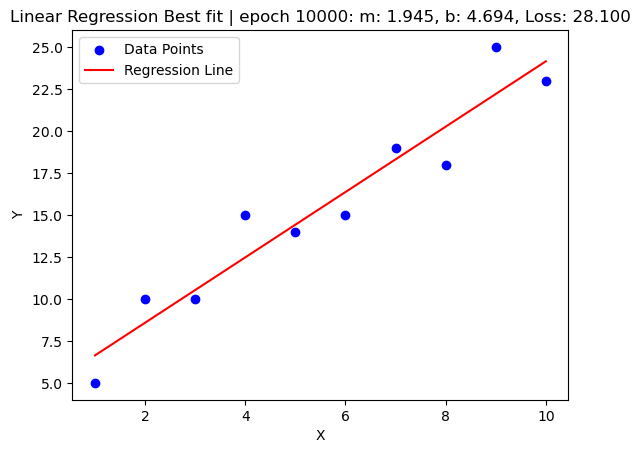

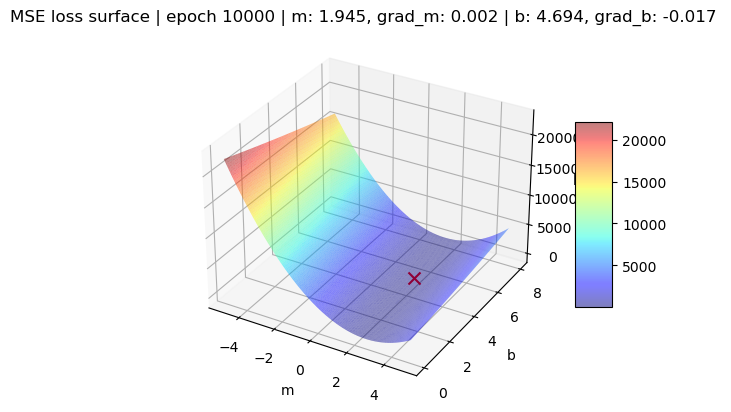

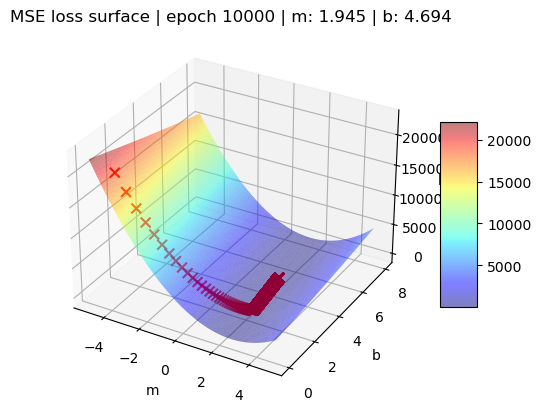

In [9]:
ex_epochs = 10000

alpha = 0.001
example_m = -4.5
example_b = 1.1 #4.68

example_loss = calc_loss(xs, ys, example_m, example_b)
example_coords = [(example_m, example_b, example_loss)]

ms = np.linspace(-5,5,100)
bs = np.linspace(0,8,100)
# mesh_m, mesh_b = np.meshgrid(ms, bs, indexing='ij')
losses_m_b = []

for m_val in ms:
    for b_val in bs:
        l = calc_loss(xs, ys, m_val, b_val)
        losses_m_b.append((m_val, b_val, l))

for i in range(ex_epochs):
    loss_grad_m = loss_gradient_m(xs, ys, example_m, example_b)
    loss_grad_b = loss_gradient_b(xs, ys, example_m, example_b)

    if i == 0 or i < 5 or i % 1000 == 0:
        plot_linear_regression(points, example_m, example_b, example_loss, i)
        plot_loss_by_parameters_3d(xs, ys, losses_m_b, example_m, example_b, loss_grad_m, loss_grad_b, i)
    example_m -= alpha * loss_grad_m
    example_b -= alpha * loss_grad_b
    example_loss = calc_loss(xs, ys, example_m, example_b)
    example_coords.append((example_m, example_b, example_loss))

plot_linear_regression(points, example_m, example_b, calc_loss(xs, ys, example_m, example_b), ex_epochs)
plot_loss_by_parameters_3d(xs, ys, losses_m_b, example_m, example_b, loss_grad_m, loss_grad_b, ex_epochs)
plot_loss_by_parameters_3d(xs, ys, losses_m_b, epoch=ex_epochs, example_coords_history=example_coords)




epoch 1:
m: 0.21052 | m_adjust: -200.52
b: 0.04067 | b_adjust: -30.669999999999995
loss: 2291.507391917   |   best loss: 2291.507391917 => keep results, repeat process
y = 0.21052x + 0.04067




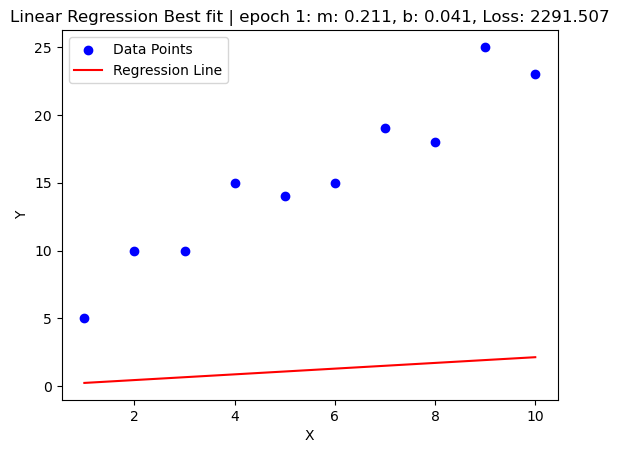



epoch 2:
m: 0.39526259 | m_adjust: -184.74259
b: 0.06907294 | b_adjust: -28.40294
loss: 1955.8671216339676   |   best loss: 1955.8671216339676 => keep results, repeat process
y = 0.39526259x + 0.06907294




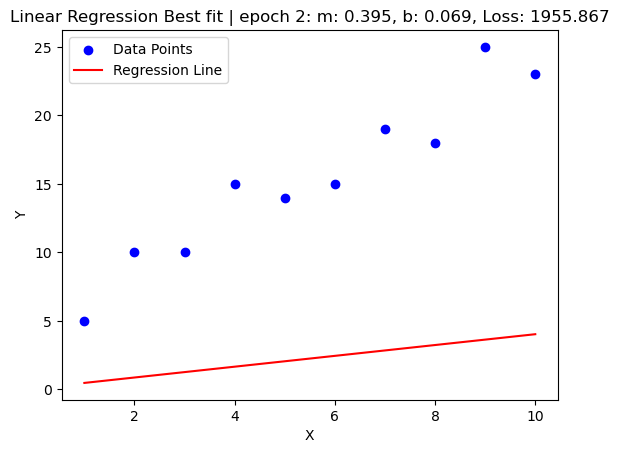



epoch 3:
m: 0.56546756823 | m_adjust: -170.20497823
b: 0.09538690562999999 | b_adjust: -26.313965629999995
loss: 1670.898464168011   |   best loss: 1670.898464168011 => keep results, repeat process
y = 0.56546756823x + 0.09538690562999999




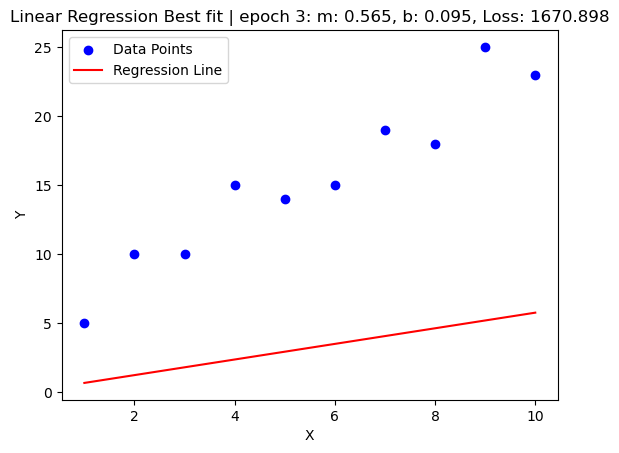



epoch 4:
m: 0.72227730951436 | m_adjust: -156.80974128436
b: 0.11977598856820999 | b_adjust: -24.389082938210002
loss: 1428.9507567559986   |   best loss: 1428.9507567559986 => keep results, repeat process
y = 0.72227730951436x + 0.11977598856820999




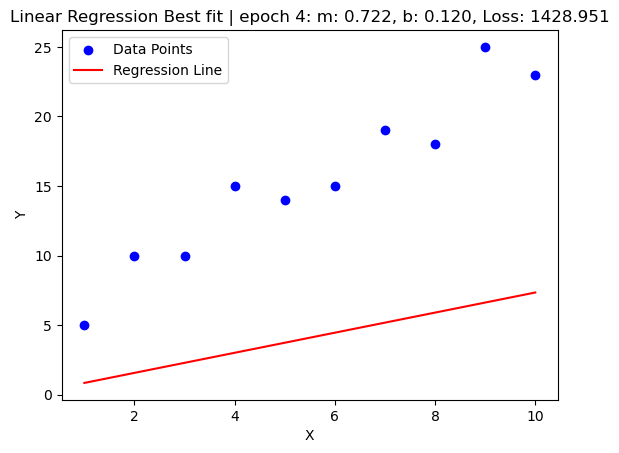



epoch 5:
m: 0.8667444208075039 | m_adjust: -144.46711129314397
b: 0.1423913861864156 | b_adjust: -22.615397618205623
loss: 1223.5284740025256   |   best loss: 1223.5284740025256 => keep results, repeat process
y = 0.8667444208075039x + 0.1423913861864156




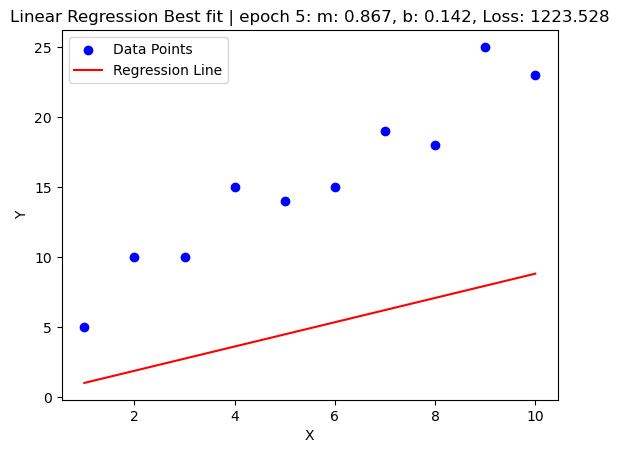



epoch 6:
m: 0.9998387951572756 | m_adjust: -133.0943743497716
b: 0.16337241478516024 | b_adjust: -20.981028598744622
loss: 1049.1168191543231   |   best loss: 1049.1168191543231 => keep results, repeat process
y = 0.9998387951572756x + 0.16337241478516024




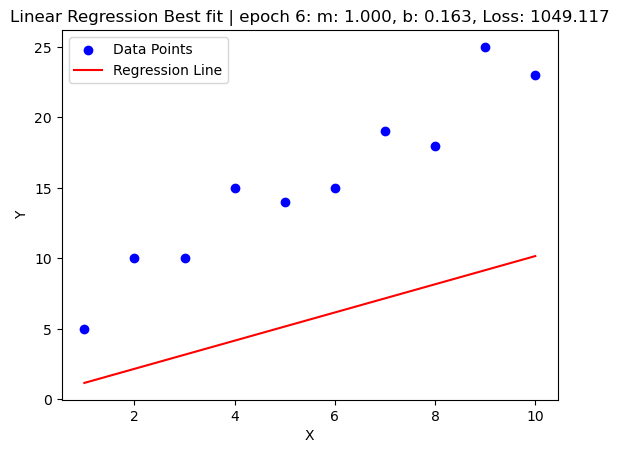



epoch 7:
m: 1.1224541113675286 | m_adjust: -122.61531621025301
b: 0.18284744320885987 | b_adjust: -19.47502842369965
loss: 901.0336485229187   |   best loss: 901.0336485229187 => keep results, repeat process
y = 1.1224541113675286x + 0.18284744320885987




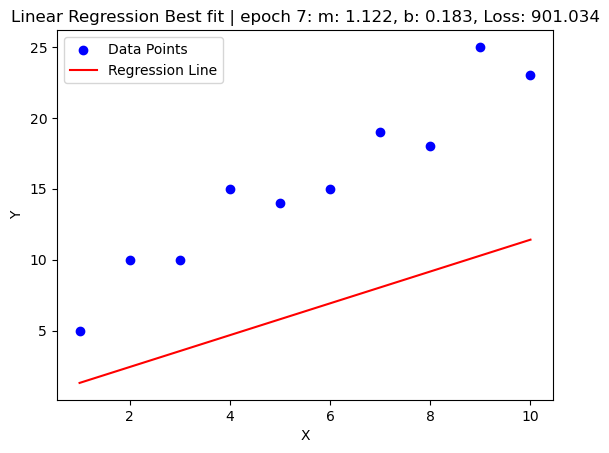



epoch 8:
m: 1.2354138229169314 | m_adjust: -112.95971154940284
b: 0.20093475309739933 | b_adjust: -18.087309888539465
loss: 775.3037531381038   |   best loss: 775.3037531381038 => keep results, repeat process
y = 1.2354138229169314x + 0.20093475309739933




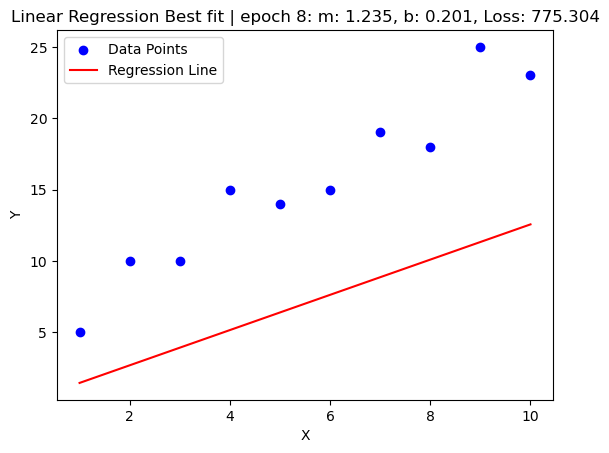



epoch 9:
m: 1.3394766762682562 | m_adjust: -104.06285335132489
b: 0.2177433315391183 | b_adjust: -16.808578441718957
loss: 668.5521220196988   |   best loss: 668.5521220196988 => keep results, repeat process
y = 1.3394766762682562x + 0.2177433315391183




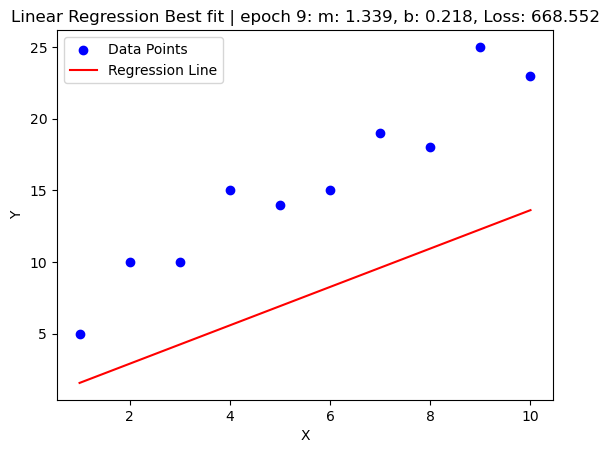



epoch 10:
m: 1.4353417955486703 | m_adjust: -95.86511928041398
b: 0.23337360143708924 | b_adjust: -15.630269897970944
loss: 577.9133211228918   |   best loss: 577.9133211228918 => keep results, repeat process
y = 1.4353417955486703x + 0.23337360143708924




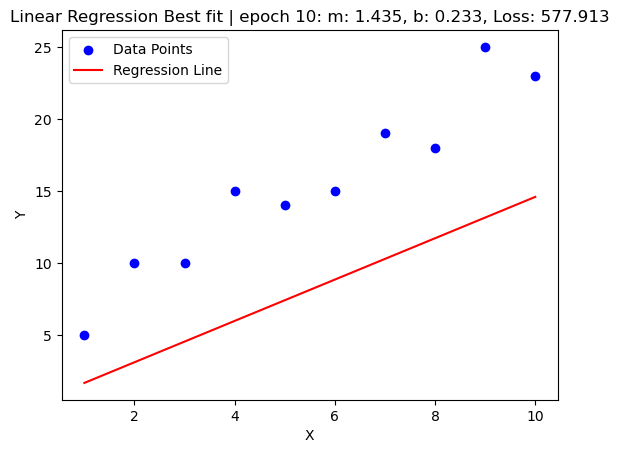



epoch 11:
m: 1.5236533676756148 | m_adjust: -88.31157212694441
b: 0.2479180944831797 | b_adjust: -14.544493046090448
loss: 500.95455472784454   |   best loss: 500.95455472784454 => keep results, repeat process
y = 1.5236533676756148x + 0.2479180944831797




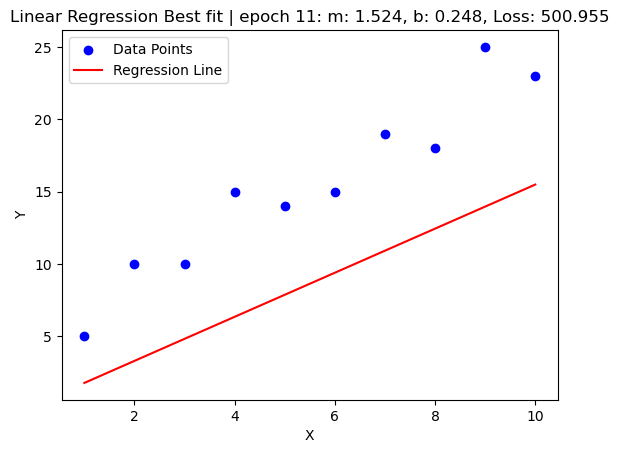



epoch 12:
m: 1.6050049593252775 | m_adjust: -81.3515916496627
b: 0.2614620712497816 | b_adjust: -13.543976766601881
loss: 435.6103434260433   |   best loss: 435.6103434260433 => keep results, repeat process
y = 1.6050049593252775x + 0.2614620712497816




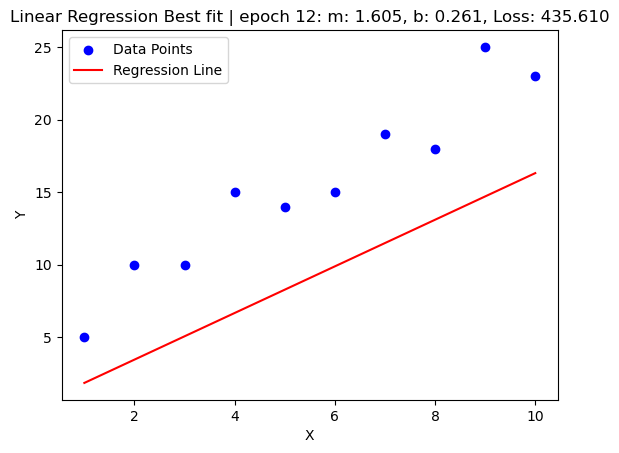



epoch 13:
m: 1.6799434946734837 | m_adjust: -74.93853534820605
b: 0.274084092554704 | b_adjust: -12.622021304922384
loss: 380.1270647684204   |   best loss: 380.1270647684204 => keep results, repeat process
y = 1.6799434946734837x + 0.274084092554704




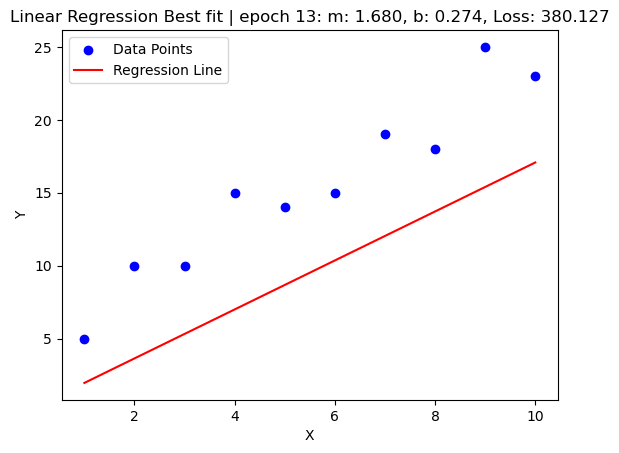



epoch 14:
m: 1.7489729205655238 | m_adjust: -69.02942589204001
b: 0.28585654592818627 | b_adjust: -11.772453373482271
loss: 333.0158674586076   |   best loss: 333.0158674586076 => keep results, repeat process
y = 1.7489729205655238x + 0.28585654592818627




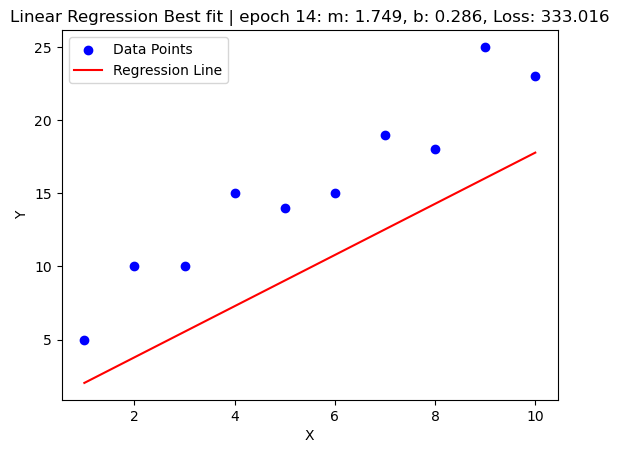



epoch 15:
m: 1.8125575836767684 | m_adjust: -63.584663111244616
b: 0.2968461307101091 | b_adjust: -10.989584781922867
loss: 293.0126948093626   |   best loss: 293.0126948093626 => keep results, repeat process
y = 1.8125575836767684x + 0.2968461307101091




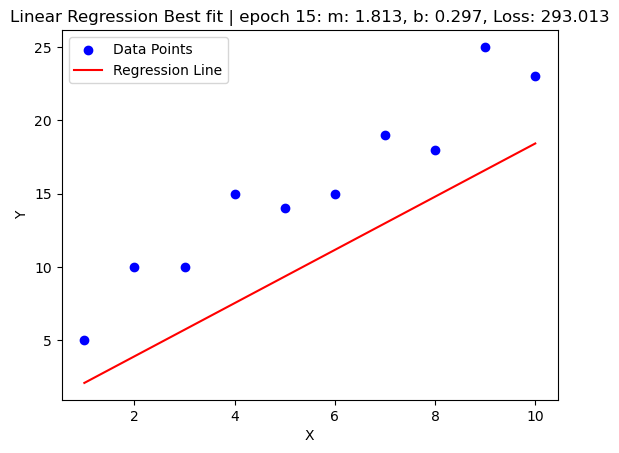



epoch 16:
m: 1.871125342295846 | m_adjust: -58.56775861907762
b: 0.30711430502824444 | b_adjust: -10.268174318135328
loss: 259.0443440681609   |   best loss: 259.0443440681609 => keep results, repeat process
y = 1.871125342295846x + 0.30711430502824444




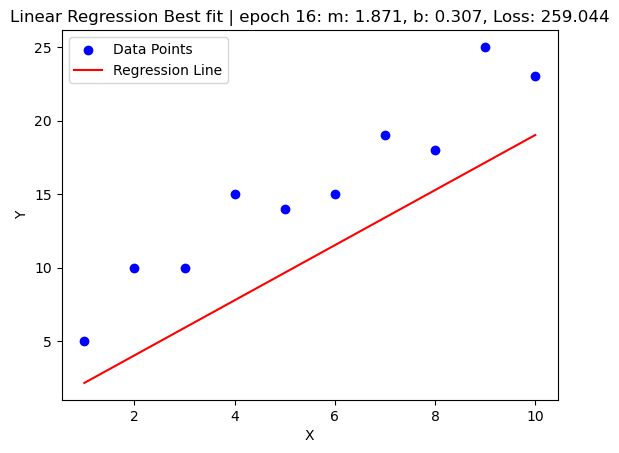



epoch 17:
m: 1.9250704335837552 | m_adjust: -53.945091287909165
b: 0.3167176976529336 | b_adjust: -9.603392624689203
loss: 230.19965028462497   |   best loss: 230.19965028462497 => keep results, repeat process
y = 1.9250704335837552x + 0.3167176976529336




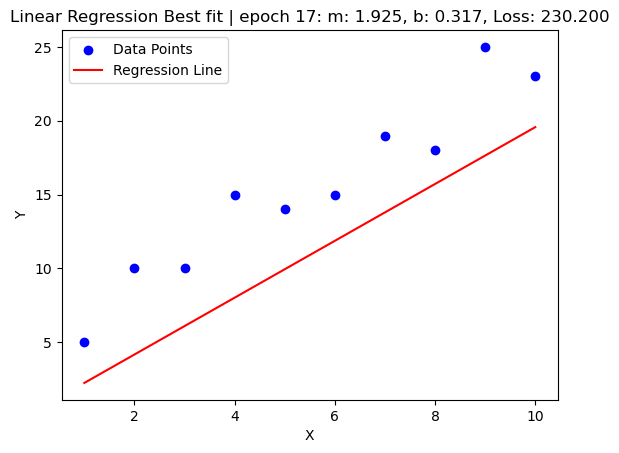



epoch 18:
m: 1.9747561155236237 | m_adjust: -49.68568193986859
b: 0.32570848748820647 | b_adjust: -8.990789835272826
loss: 205.70502098946545   |   best loss: 205.70502098946545 => keep results, repeat process
y = 1.9747561155236237x + 0.32570848748820647




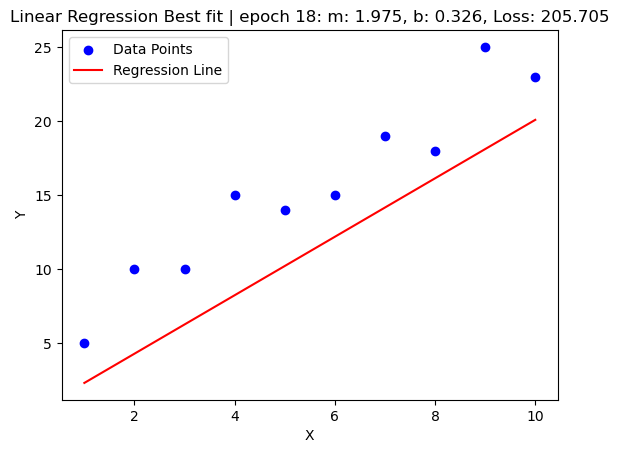



epoch 19:
m: 2.0205171012659346 | m_adjust: -45.760985742310694
b: 0.3341347532424702 | b_adjust: -8.426265754263724
loss: 184.9036647764928   |   best loss: 184.9036647764928 => keep results, repeat process
y = 2.0205171012659346x + 0.3341347532424702




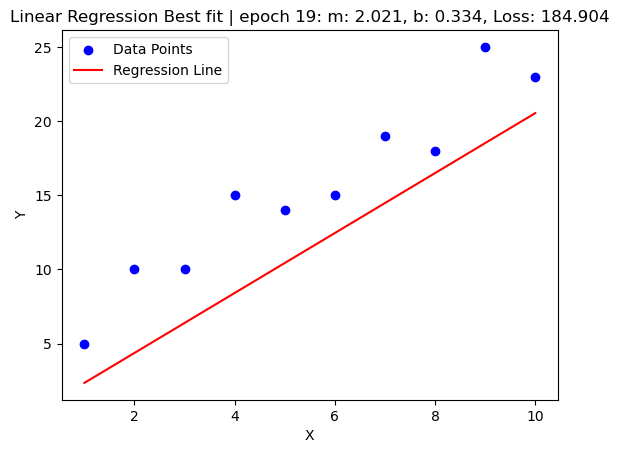



epoch 20:
m: 2.0626618021827907 | m_adjust: -42.14470091685587
b: 0.34204079562206 | b_adjust: -7.906042379589778
loss: 167.23795606274828   |   best loss: 167.23795606274828 => keep results, repeat process
y = 2.0626618021827907x + 0.34204079562206




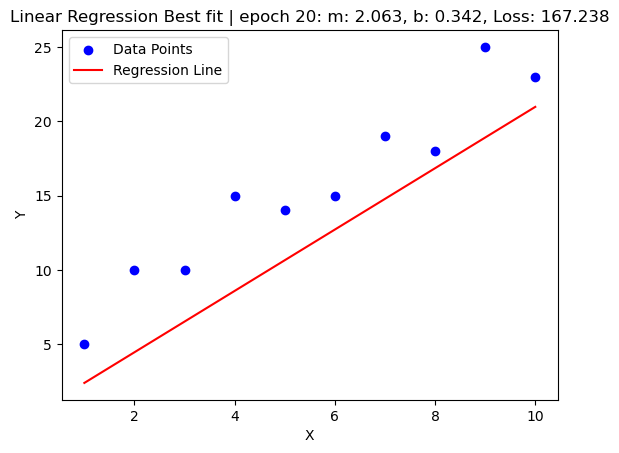



epoch 100:
m: 2.5386843821254654 | m_adjust: 0.19126200897392492
b: 0.5561125257145981 | b_adjust: -1.7636702034989677
loss: 65.49054904112886   |   best loss: 65.49054904112886 => keep results, repeat process
y = 2.5386843821254654x + 0.5561125257145981




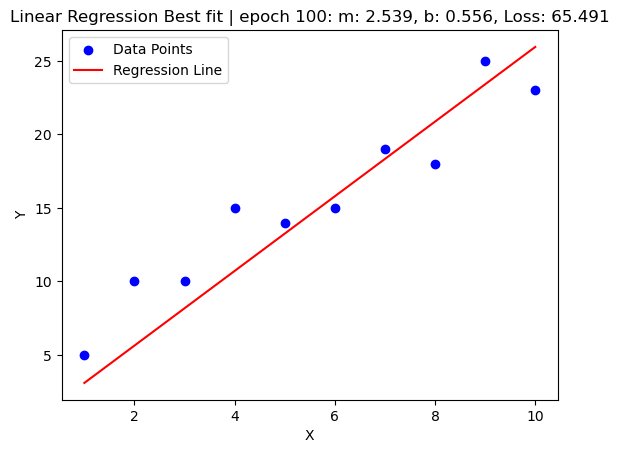



epoch 200:
m: 2.5147166203949953 | m_adjust: 0.24169364366861715
b: 0.7280376090697668 | b_adjust: -1.682748825085334
loss: 62.477318014201295   |   best loss: 62.477318014201295 => keep results, repeat process
y = 2.5147166203949953x + 0.7280376090697668




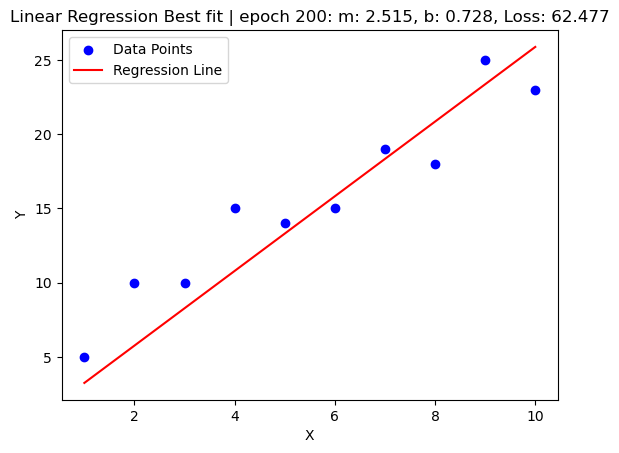



epoch 300:
m: 2.491051338059191 | m_adjust: 0.23176802564810545
b: 0.8927925148695444 | b_adjust: -1.6135278590457713
loss: 59.70707008618853   |   best loss: 59.70707008618853 => keep results, repeat process
y = 2.491051338059191x + 0.8927925148695444




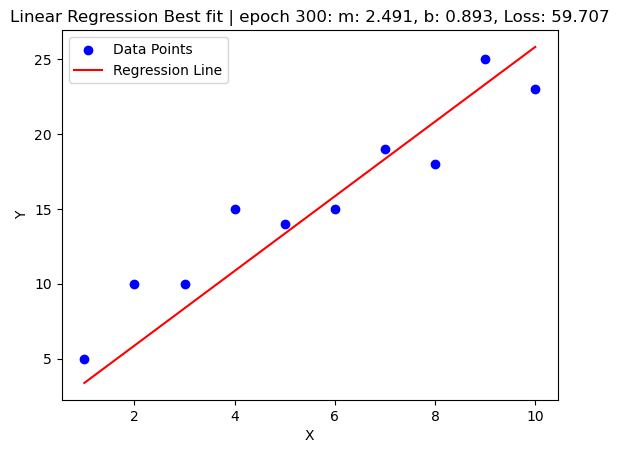



epoch 400:
m: 2.4683593188736266 | m_adjust: 0.22223442380683522
b: 1.0507703220286955 | b_adjust: -1.5471565828365126
loss: 57.16003902358708   |   best loss: 57.16003902358708 => keep results, repeat process
y = 2.4683593188736266x + 1.0507703220286955




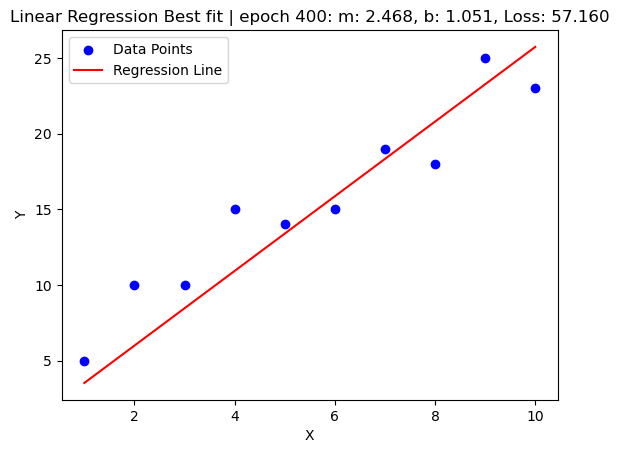



epoch 500:
m: 2.4466007190671983 | m_adjust: 0.21309297508873115
b: 1.202249828879987 | b_adjust: -1.4835154406561823
loss: 54.81823879397811   |   best loss: 54.81823879397811 => keep results, repeat process
y = 2.4466007190671983x + 1.202249828879987




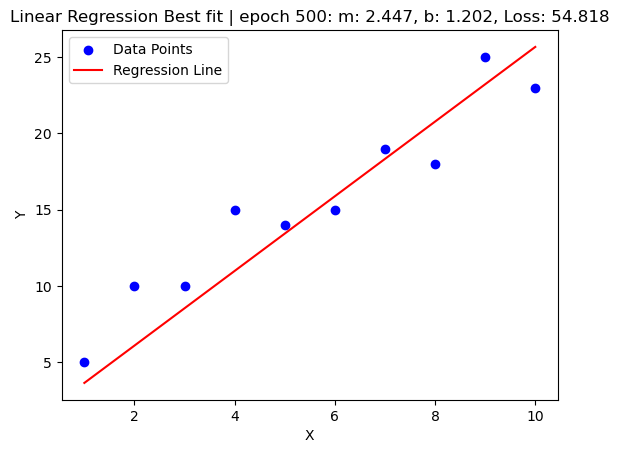



epoch 600:
m: 2.4257371431770696 | m_adjust: 0.20432755310390788
b: 1.3474983382098578 | b_adjust: -1.422492129807992
loss: 52.66513261638977   |   best loss: 52.66513261638977 => keep results, repeat process
y = 2.4257371431770696x + 1.3474983382098578




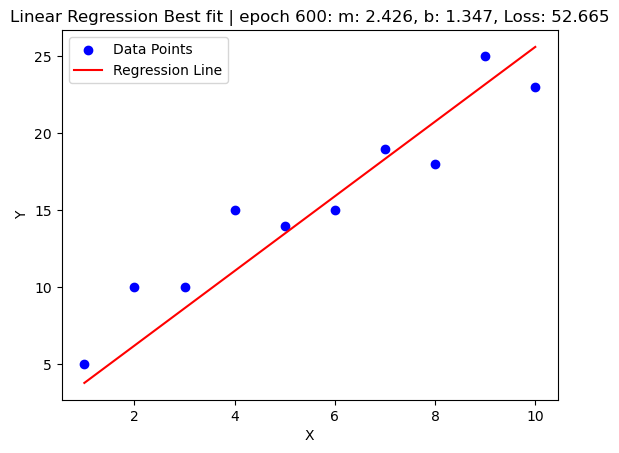



epoch 700:
m: 2.4057317750561737 | m_adjust: 0.19592269027188963
b: 1.486772157494605 | b_adjust: -1.3639789677353575
loss: 50.68551618568212   |   best loss: 50.68551618568212 => keep results, repeat process
y = 2.4057317750561737x + 1.486772157494605




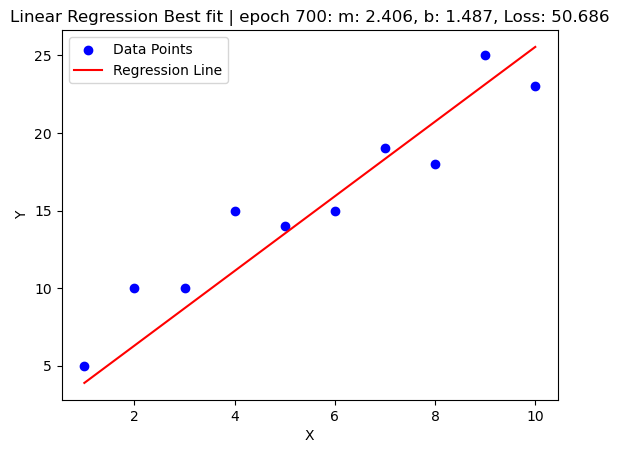



epoch 800:
m: 2.386549312962419 | m_adjust: 0.18786355525847043
b: 1.6203170511919882 | b_adjust: -1.3078727013242197
loss: 48.86541030631606   |   best loss: 48.86541030631606 => keep results, repeat process
y = 2.386549312962419x + 1.6203170511919882




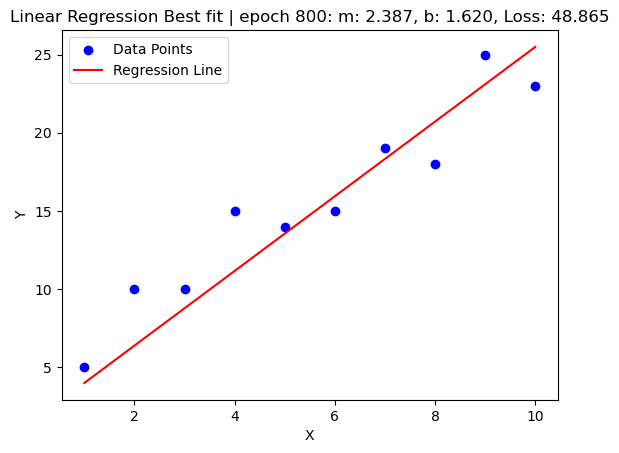



epoch 900:
m: 2.3681559072647764 | m_adjust: 0.1801359268055293
b: 1.7483686744204916 | b_adjust: -1.2540743247010142
loss: 47.19196217731736   |   best loss: 47.19196217731736 => keep results, repeat process
y = 2.3681559072647764x + 1.7483686744204916




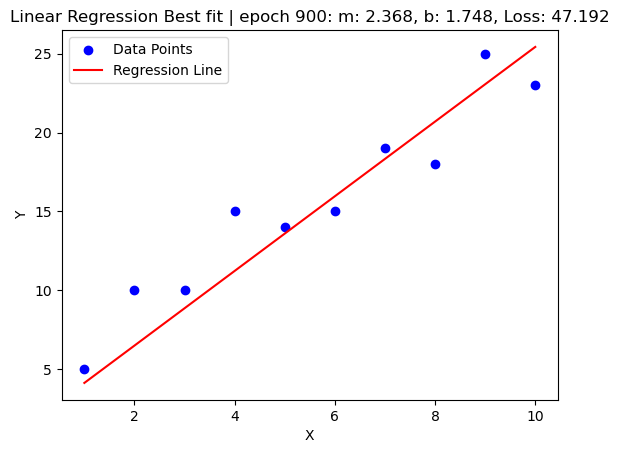



epoch 1000:
m: 2.350519100711763 | m_adjust: 0.17272616863578633
b: 1.8711529887995295 | b_adjust: -1.2024889045256004
loss: 45.65335463135158   |   best loss: 45.65335463135158 => keep results, repeat process
y = 2.350519100711763x + 1.8711529887995295




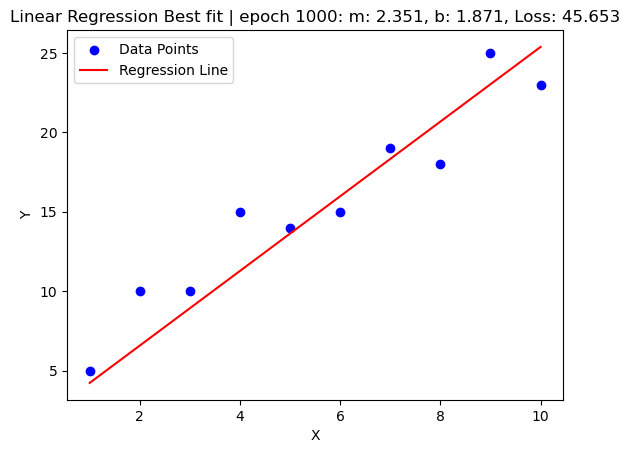



epoch 1100:
m: 2.333607771156938 | m_adjust: 0.16562120539005534
b: 1.9888866611843599 | b_adjust: -1.1530254124706112
loss: 44.23872268699653   |   best loss: 44.23872268699653 => keep results, repeat process
y = 2.333607771156938x + 1.9888866611843599




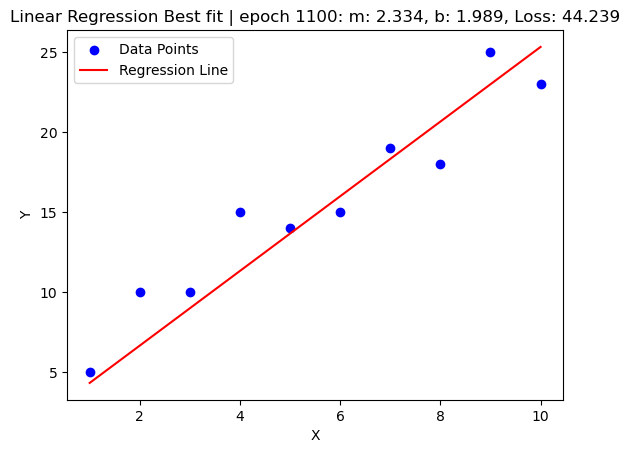



epoch 1200:
m: 2.317392076640347 | m_adjust: 0.15880849955463602
b: 2.1017774459993372 | b_adjust: -1.1055965645915893
loss: 42.9380768249397   |   best loss: 42.9380768249397 => keep results, repeat process
y = 2.317392076640347x + 2.1017774459993372




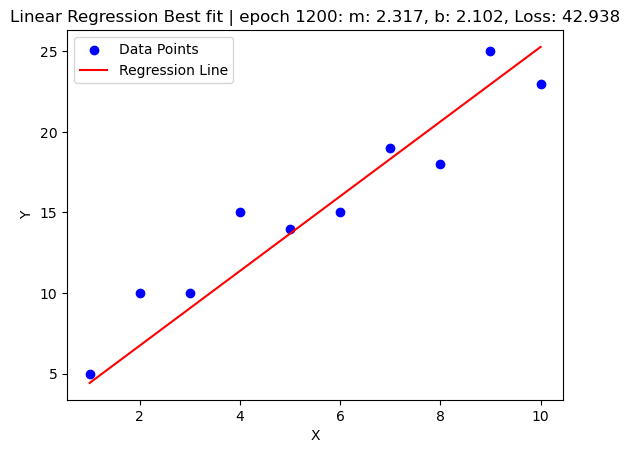



epoch 1300:
m: 2.3018434027289927 | m_adjust: 0.15227602933688972
b: 2.210024551844169 | b_adjust: -1.0601186673046452
loss: 41.74223244631101   |   best loss: 41.74223244631101 => keep results, repeat process
y = 2.3018434027289927x + 2.210024551844169




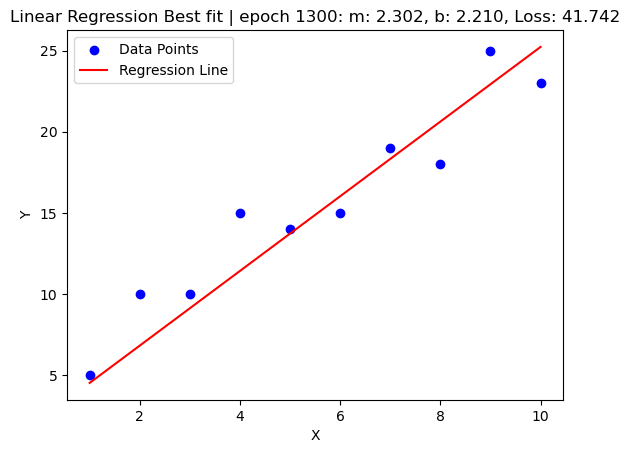



epoch 1400:
m: 2.2869343120234253 | m_adjust: 0.1460122674519269
b: 2.3138189930200967 | b_adjust: -1.0165114696995547
loss: 40.642745015015635   |   best loss: 40.642745015015635 => keep results, repeat process
y = 2.2869343120234253x + 2.3138189930200967




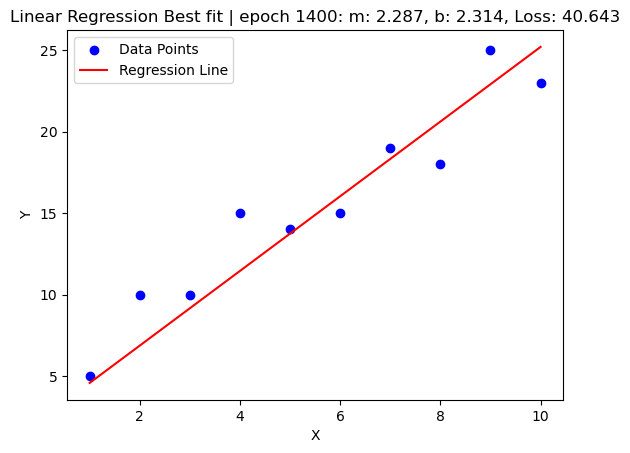



epoch 1500:
m: 2.272638495741336 | m_adjust: 0.14000616078110895
b: 2.4133439265962977 | b_adjust: -0.9746980219279688
loss: 39.631850426070244   |   best loss: 39.631850426070244 => keep results, repeat process
y = 2.272638495741336x + 2.4133439265962977




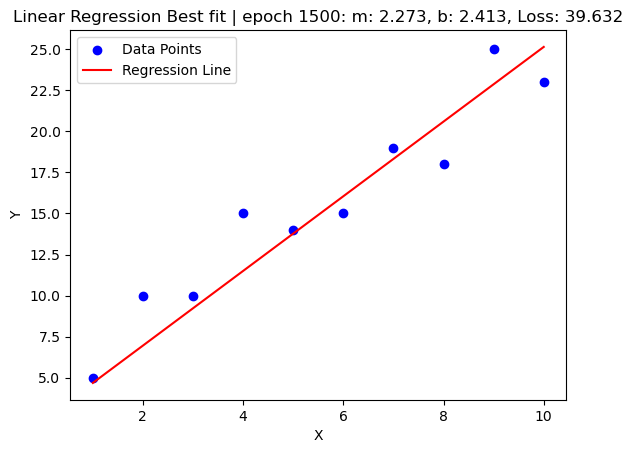



epoch 1600:
m: 2.258930727292726 | m_adjust: 0.13424711086770316
b: 2.508774975611326 | b_adjust: -0.9346045394166526
loss: 38.70241017884965   |   best loss: 38.70241017884965 => keep results, repeat process
y = 2.258930727292726x + 2.508774975611326




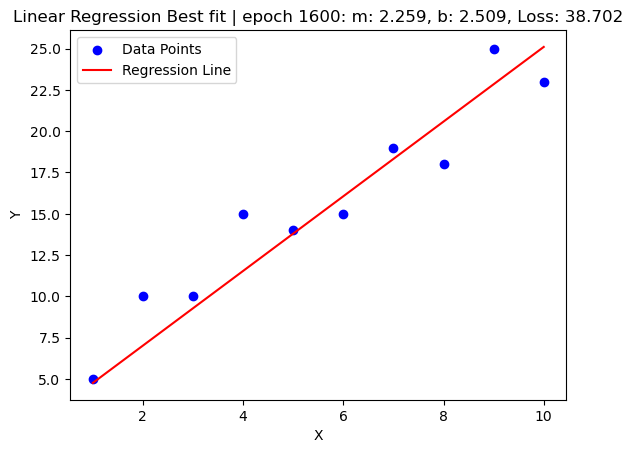



epoch 1700:
m: 2.245786817764724 | m_adjust: 0.12872495521467756
b: 2.6002805389798826 | b_adjust: -0.8961602726662392
loss: 37.847860968081186   |   best loss: 37.847860968081186 => keep results, repeat process
y = 2.245786817764724x + 2.6002805389798826




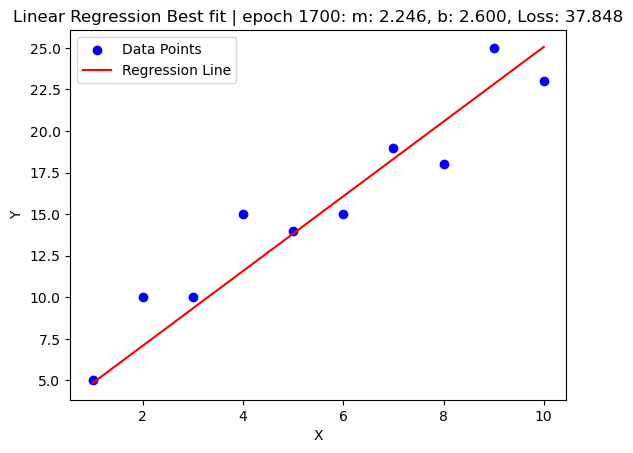



epoch 1800:
m: 2.233183573237508 | m_adjust: 0.12342994935174403
b: 2.6880220886518194 | b_adjust: -0.8592973824057164
loss: 37.06216833661961   |   best loss: 37.06216833661961 => keep results, repeat process
y = 2.233183573237508x + 2.6880220886518194




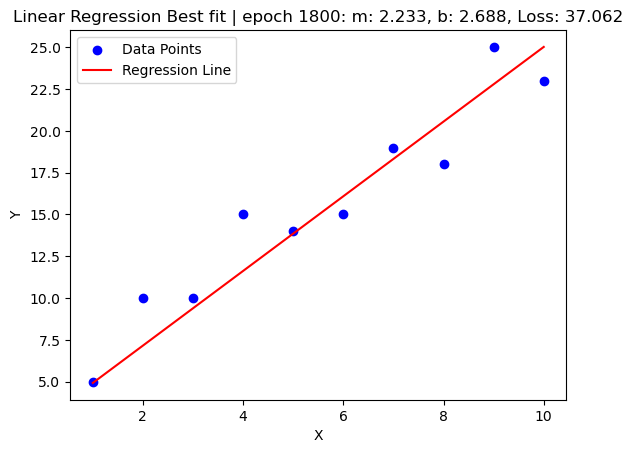



epoch 1900:
m: 2.221098753855999 | m_adjust: 0.11835274964032863
b: 2.77215445454771 | b_adjust: -0.8239508198823124
loss: 36.33978406271932   |   best loss: 36.33978406271932 => keep results, repeat process
y = 2.221098753855999x + 2.77215445454771




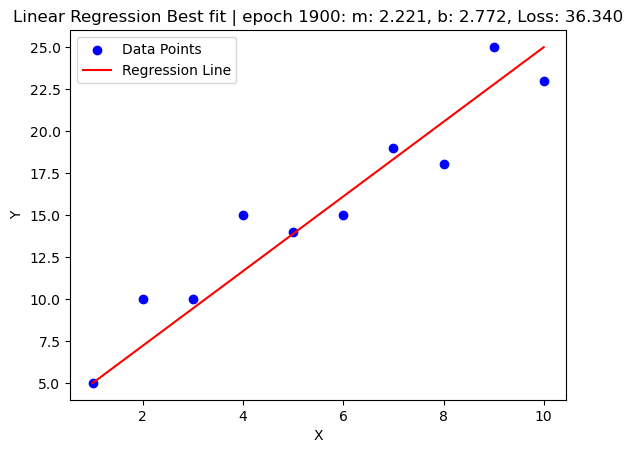



epoch 2000:
m: 2.2095110345851134 | m_adjust: 0.11348439678528024
b: 2.8528260977738107 | b_adjust: -0.7900582120756449
loss: 35.67560698089067   |   best loss: 35.67560698089067 => keep results, repeat process
y = 2.2095110345851134x + 2.8528260977738107




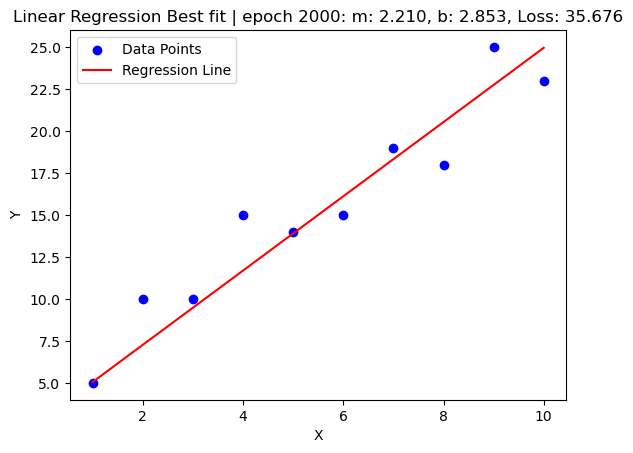

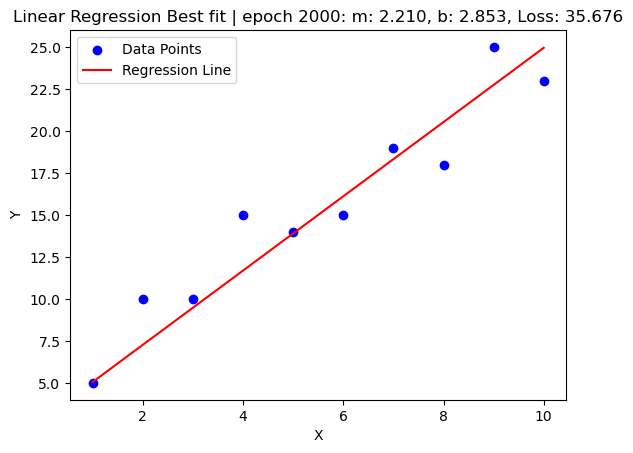

In [10]:
for i in range(epochs):
    m, b, best_loss, kept_results_gd = regression_step_gd(xs, ys, m, b, best_loss, kept_results_gd) 

plot_linear_regression(points, kept_results_gd[-1][0], kept_results_gd[-1][1], kept_results_gd[-1][2], epochs)

best results HC: m: 1.94009, b: 4.73279, loss: 28.09712, iter: 122745


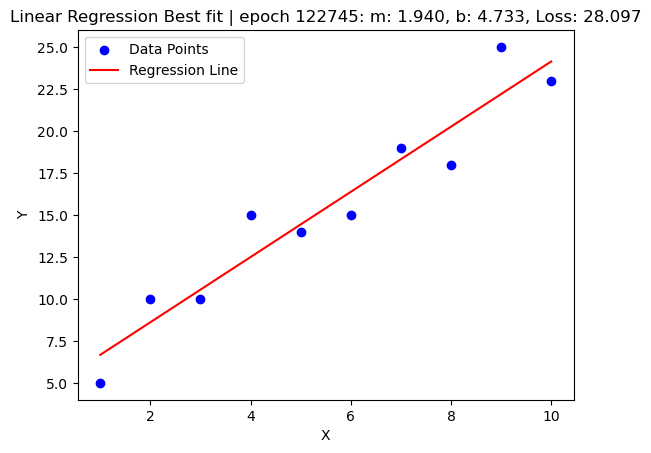

best results GD: m: 2.20951, b: 2.85283, loss: 35.67561, iter: 1999


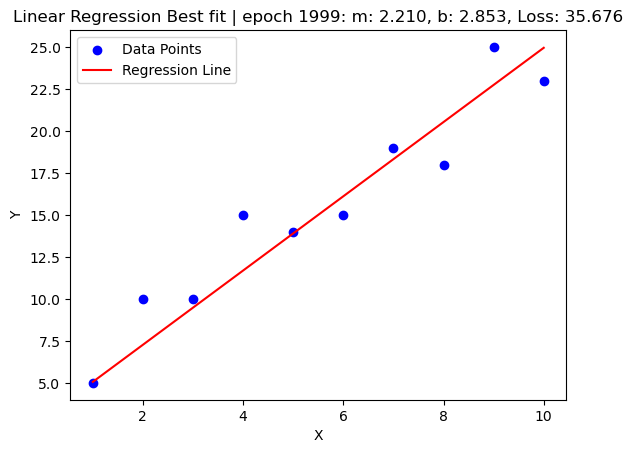

In [11]:
print(f"best results HC: m: {kept_results_hc[-1][0]:.5f}, b: {kept_results_hc[-1][1]:.5f}, loss: {kept_results_hc[-1][2]:.5f}, iter: {kept_results_hc[-1][3]}")
plot_linear_regression(points, kept_results_hc[-1][0], kept_results_hc[-1][1], kept_results_hc[-1][2], kept_results_hc[-1][3])
print(f"best results GD: m: {kept_results_gd[-1][0]:.5f}, b: {kept_results_gd[-1][1]:.5f}, loss: {kept_results_gd[-1][2]:.5f}, iter: {kept_results_gd[-1][3]}")
plot_linear_regression(points, kept_results_gd[-1][0], kept_results_gd[-1][1], kept_results_gd[-1][2], kept_results_gd[-1][3])

In [12]:
loss_gradient_m(xs,ys,2.506,0.461)

calc_loss(xs, ys, 2.586, 0.461)
calc_loss(xs, ys, 1.935, 4.76)

28.098625000000023

## Matrix notation
### Numpy
#### Linear regression with Hill Climbing
Linear regression can be expressed in the following way by using matrix notation, where $\beta$ are the coefficients and $X$ contains the values of the independent variable(s) plus a constant term (1) for the $beta_0$ variable.
$$
y = X\beta \\
\epsilon(y, X, \beta) = y - X\beta \\
L(\epsilon) = MSE(\epsilon) = \frac{1}{n}\epsilon^T\epsilon \\
$$
The formulas above are sufficient to implement the linear regression algorithm with MSE as loss function by utilizing Hill Climbing.    

#### Linear regression with Gradient Descent
If we want to use Gradient Descent we furthermore need to find the first order partial derivatives of our loss function with respect to $\beta$ to obtain the gradients we need.
First we expand the equation for the loss function:
$$
L(\beta) = \frac{1}{n}(y-X \beta)^T(y-X \beta)\\
L(\beta) = \frac{1}{n}(y^T y - (X \beta)^T y - y^T X \beta + (X \beta)^T(X \beta) \\

L(\beta) = \frac{1}{n}(y^T y - \beta^T X^T y - (y^T X \beta)^T + \beta^T X^T X \beta) \\
L(\beta) = \frac{1}{n}(y^T y - \beta^T X^T y - \beta^T X^T y + \beta^T X^T X \beta) \\
L(\beta) = \frac{1}{n}(y^T y - 2 \beta^T X^T y + \beta^T X^T X \beta) \\
$$

Now we use this expanded form to find the first order partial derivatives (basically $ \frac{\delta L}{\delta \beta}$):
$$
\Delta L(\beta) = \frac{1}{n}(\Delta y^T y - 2 \Delta \beta^T X^T y + \Delta \beta^T X^T X \beta) \\
\Delta L(\beta) = \frac{1}{n}(- 2 X^T y + 2 X^T X \beta) \\
\Delta L(\beta) = \frac{2}{n}(X^T X \beta - X^T y)
$$
  
The last equation will deliver the gradients for every component of $\beta$. We can use this in order to iteratively find the best possible solution for our problem.  

Another approach is to directly try to solve for $\beta$ by setting the partial derivative from above to 0 and rearrangeing the equation:
$$
X^T X \beta - X^T y = 0 \\
X^T X \beta = X^T y \\
(X^T X)^{-1} X^T X \beta = (X^T X)^{-1} X^T y \\
\beta = (X^T X)^{-1} X^T y \\
$$

The term $(X^T X)^{-1} X^T$ is called the _pseudoinverse_ of X. The most important property of the pseudoinverse is that for any system of linear equations $Ax = b$ (overdetermined or underdetermined) $x = A^+b$ minimizes $\|Ax - b\|_2$ and has the minimum 2-norm over all minimizers. In other words, the pseudoinverse provides the minimum 2-norm least squares solution to $Ax = b$.  
If matrix A is full rank (e.g. $rank(A)=n<=m$) then the pseudoinverse can be calculated via $(A^T A)^{-1} A^T$, otherwise we have to fall back on the usage of the SVD (Singular Value Decomposition).



epoch 1:
beta: [0.69  3.952]
gradient: [ -29.5 -192.6]
loss: 85.5916748046875   |   best loss: 1000000000 => keep results, repeat process
y = X[0.69  3.952]'




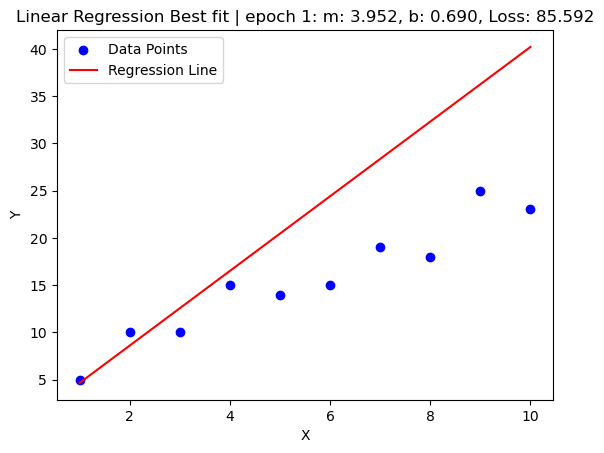



epoch 2:
beta: [0.40896 1.74212]
gradient: [ 14.051999 110.493996]
loss: 32.39215087890625   |   best loss: 85.5916748046875 => keep results, repeat process
y = X[0.40896 1.74212]'




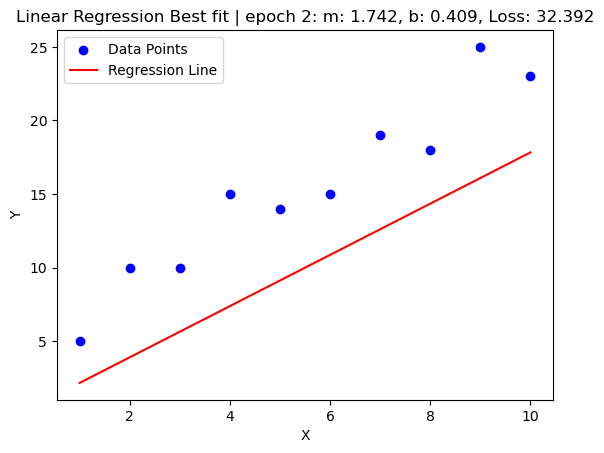



epoch 3:
beta: [0.6253352 2.997284 ]
gradient: [-10.818759 -62.758205]
loss: 14.967988586425783   |   best loss: 32.39215087890625 => keep results, repeat process
y = X[0.6253352 2.997284 ]'




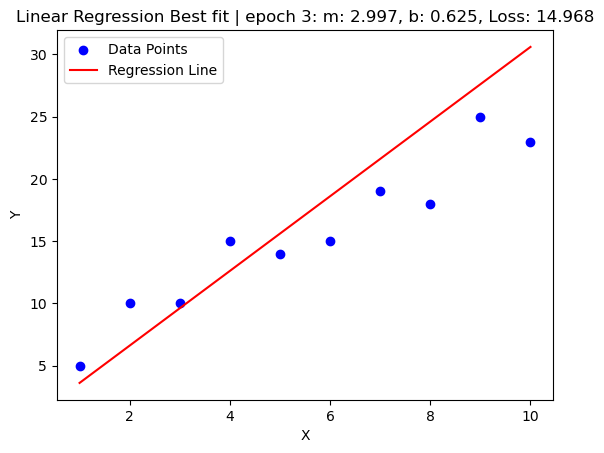



epoch 4:
beta: [0.55691934 2.2718928 ]
gradient: [ 3.4207947 36.269558 ]
loss: 9.233335876464844   |   best loss: 14.967988586425783 => keep results, repeat process
y = X[0.55691934 2.2718928 ]'




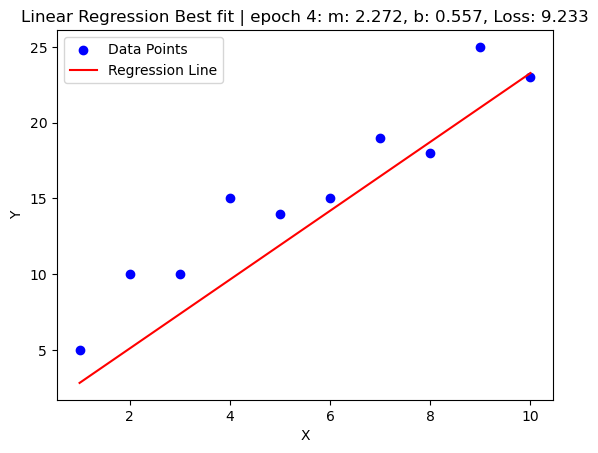



epoch 5:
beta: [0.65082616 2.6786556 ]
gradient: [ -4.69534  -20.338148]
loss: 7.3186592102050785   |   best loss: 9.233335876464844 => keep results, repeat process
y = X[0.65082616 2.6786556 ]'




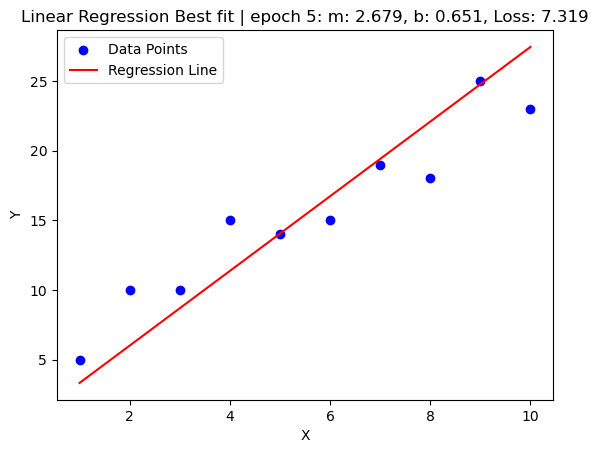



epoch 6:
beta: [0.6514889 2.438344 ]
gradient: [-0.03313599 12.015576  ]
loss: 6.652769470214844   |   best loss: 7.3186592102050785 => keep results, repeat process
y = X[0.6514889 2.438344 ]'




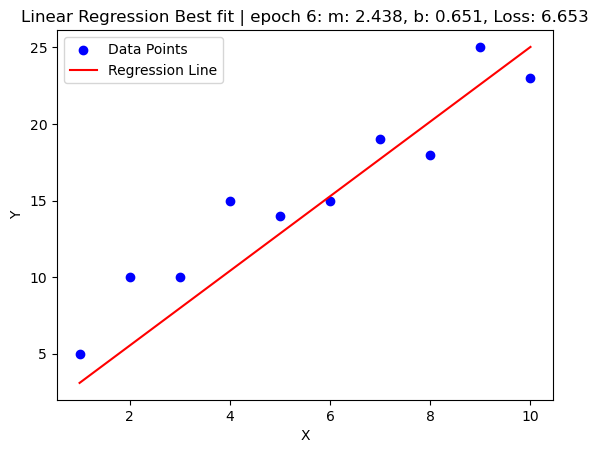



epoch 7:
beta: [0.70499367 2.5679665 ]
gradient: [-2.6752381 -6.481128 ]
loss: 6.395560455322266   |   best loss: 6.652769470214844 => keep results, repeat process
y = X[0.70499367 2.5679665 ]'




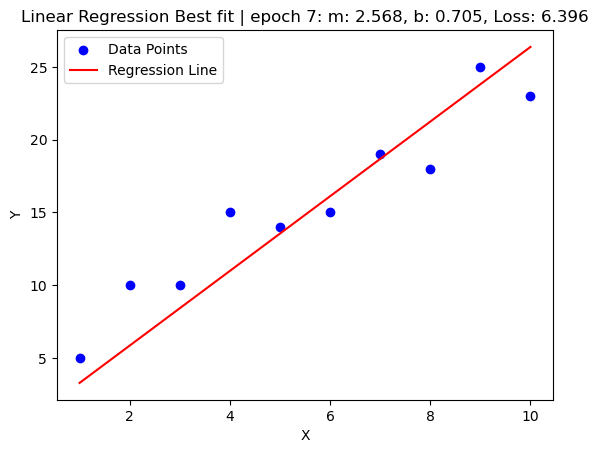



epoch 8:
beta: [0.72784126 2.4861994 ]
gradient: [-1.1423798  4.0883546]
loss: 6.272542953491211   |   best loss: 6.395560455322266 => keep results, repeat process
y = X[0.72784126 2.4861994 ]'




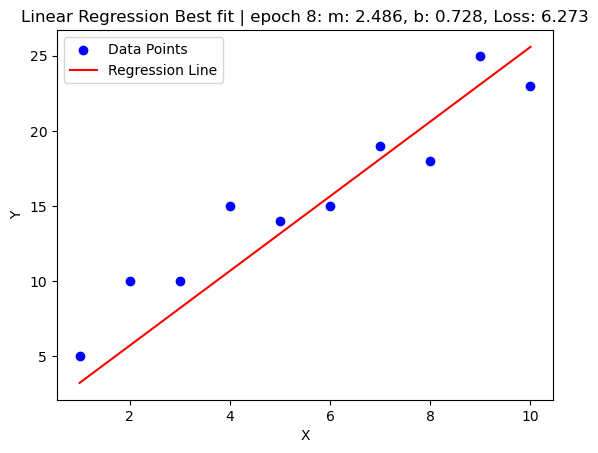



epoch 9:
beta: [0.76776373 2.5253272 ]
gradient: [-1.9961243 -1.9563965]
loss: 6.194023513793946   |   best loss: 6.272542953491211 => keep results, repeat process
y = X[0.76776373 2.5253272 ]'




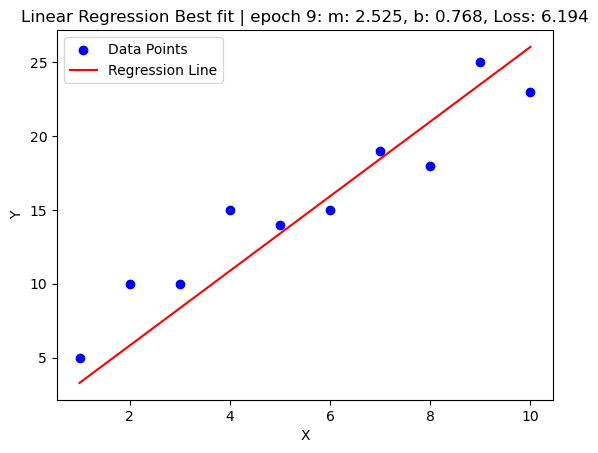



epoch 10:
beta: [0.7974812 2.4954154]
gradient: [-1.4858735  1.4955933]
loss: 6.130683517456055   |   best loss: 6.194023513793946 => keep results, repeat process
y = X[0.7974812 2.4954154]'




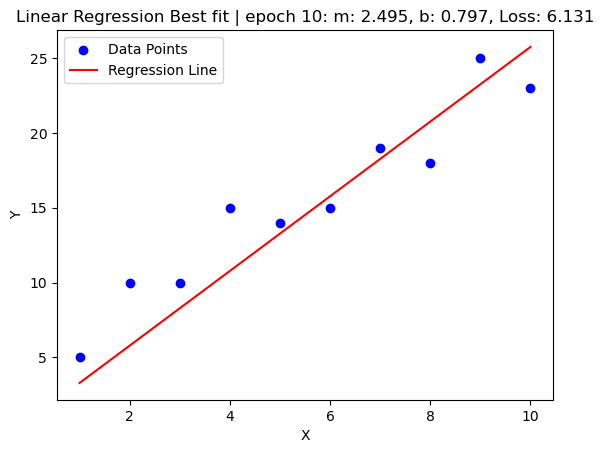



epoch 11:
beta: [0.8325906 2.50503  ]
gradient: [-1.7554687 -0.4807251]
loss: 6.072931289672852   |   best loss: 6.130683517456055 => keep results, repeat process
y = X[0.8325906 2.50503  ]'




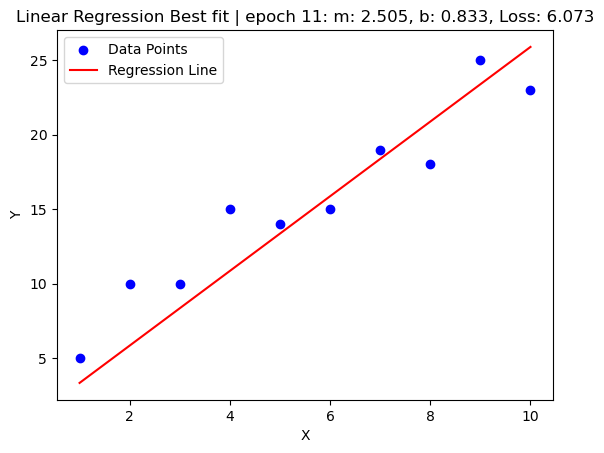



epoch 12:
beta: [0.8641804 2.4921138]
gradient: [-1.5794891   0.64580077]
loss: 6.017627716064453   |   best loss: 6.072931289672852 => keep results, repeat process
y = X[0.8641804 2.4921138]'




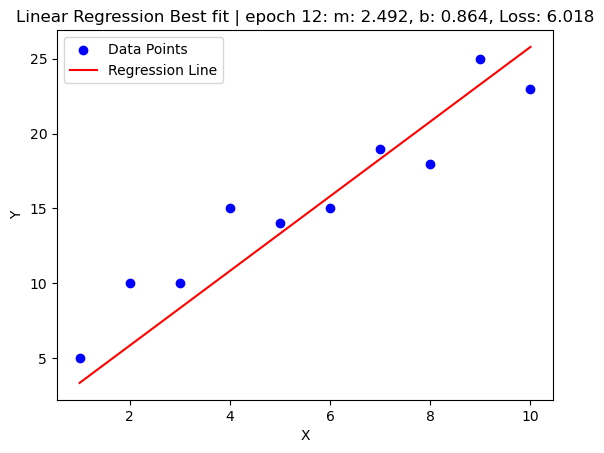



epoch 13:
beta: [0.89734817 2.4921389 ]
gradient: [-1.6583893e+00 -1.2573242e-03]
loss: 5.963732147216797   |   best loss: 6.017627716064453 => keep results, repeat process
y = X[0.89734817 2.4921389 ]'




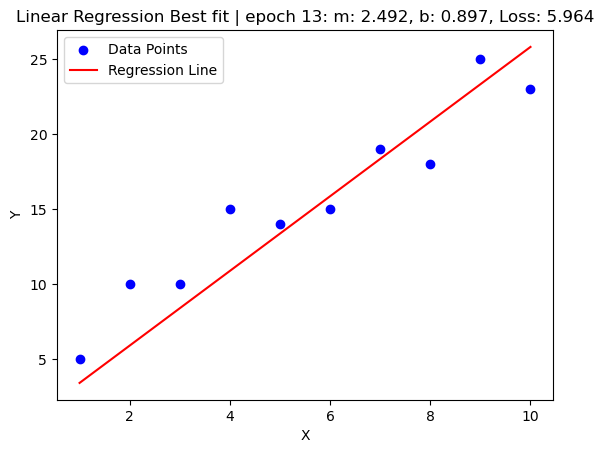



epoch 14:
beta: [0.92918366 2.4848285 ]
gradient: [-1.5917755   0.36551514]
loss: 5.910896301269531   |   best loss: 5.963732147216797 => keep results, repeat process
y = X[0.92918366 2.4848285 ]'




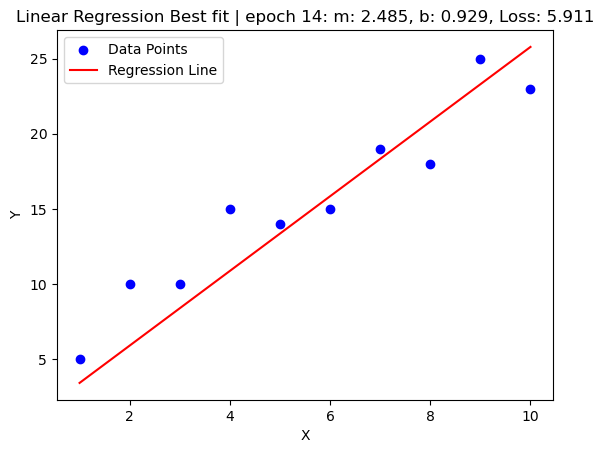



epoch 15:
beta: [0.961354  2.4817724]
gradient: [-1.6085175   0.15280762]
loss: 5.858994293212891   |   best loss: 5.910896301269531 => keep results, repeat process
y = X[0.961354  2.4817724]'




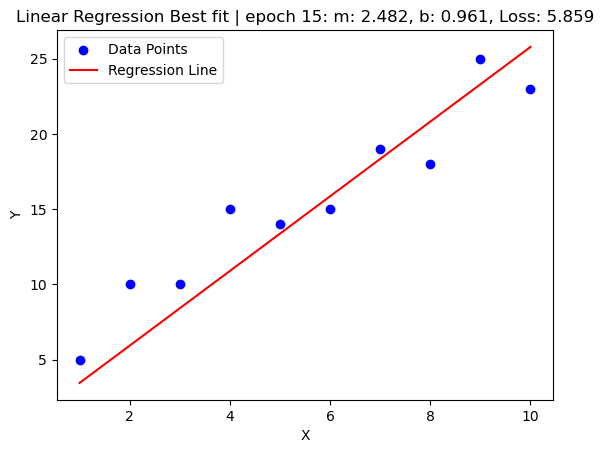



epoch 16:
beta: [0.9929099 2.476345 ]
gradient: [-1.5777954  0.2713623]
loss: 5.807979583740234   |   best loss: 5.858994293212891 => keep results, repeat process
y = X[0.9929099 2.476345 ]'




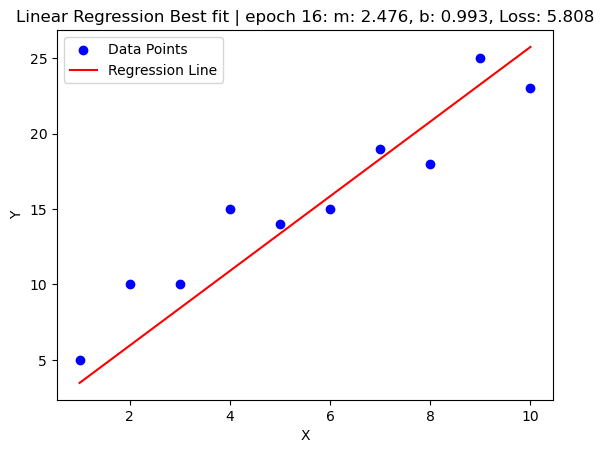



epoch 17:
beta: [1.0243976 2.4723337]
gradient: [-1.5743866   0.20057373]
loss: 5.757822799682618   |   best loss: 5.807979583740234 => keep results, repeat process
y = X[1.0243976 2.4723337]'




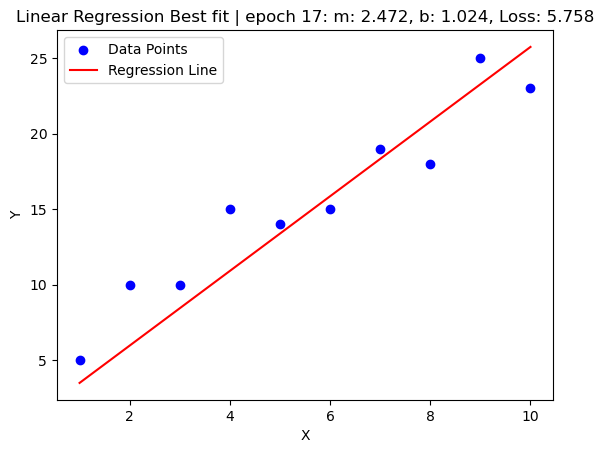



epoch 18:
beta: [1.0555084 2.4675725]
gradient: [-1.5555359   0.23806153]
loss: 5.708506011962891   |   best loss: 5.757822799682618 => keep results, repeat process
y = X[1.0555084 2.4675725]'




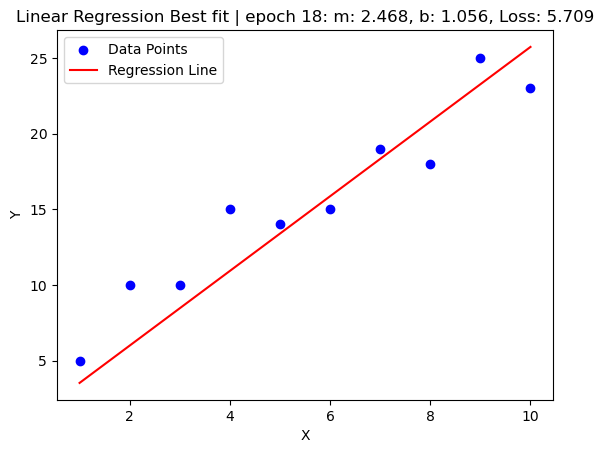



epoch 19:
beta: [1.0864221 2.463299 ]
gradient: [-1.5456848   0.21367188]
loss: 5.660016632080079   |   best loss: 5.708506011962891 => keep results, repeat process
y = X[1.0864221 2.463299 ]'




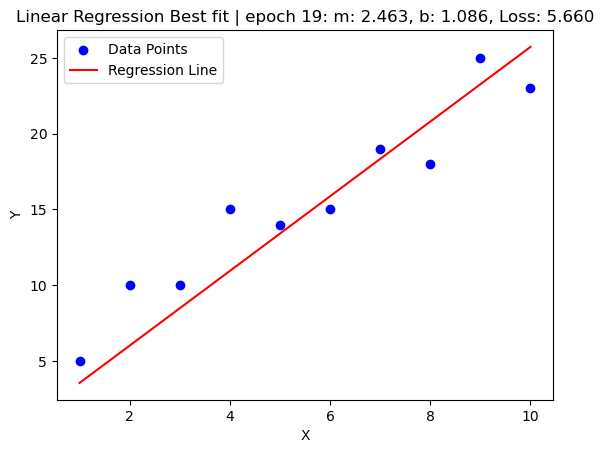



epoch 20:
beta: [1.1170394 2.4588056]
gradient: [-1.5308656   0.22467041]
loss: 5.612335968017579   |   best loss: 5.660016632080079 => keep results, repeat process
y = X[1.1170394 2.4588056]'




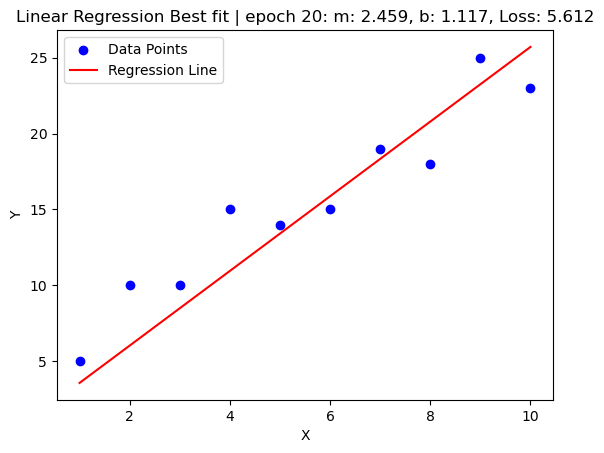



epoch 21:
beta: [1.1474206 2.4544961]
gradient: [-1.5190613  0.2154663]
loss: 5.565456008911133   |   best loss: 5.612335968017579 => keep results, repeat process
y = X[1.1474206 2.4544961]'




epoch 22:
beta: [1.1775347 2.4501395]
gradient: [-1.5057007   0.21783447]
loss: 5.519358444213868   |   best loss: 5.565456008911133 => keep results, repeat process
y = X[1.1775347 2.4501395]'




epoch 23:
beta: [1.2074026 2.445867 ]
gradient: [-1.493396    0.21362305]
loss: 5.474032974243165   |   best loss: 5.519358444213868 => keep results, repeat process
y = X[1.2074026 2.445867 ]'




epoch 24:
beta: [1.2370157 2.4416032]
gradient: [-1.4806579  0.2131958]
loss: 5.429462432861328   |   best loss: 5.474032974243165 => keep results, repeat process
y = X[1.2370157 2.4416032]'




epoch 25:
beta: [1.2663823 2.4373908]
gradient: [-1.4683319   0.21062012]
loss: 5.385642242431641   |   best loss: 5.429462432861328 => keep results, repeat process
y = X[1.2663823 2.4373908]'




epoch 26:
beta: [

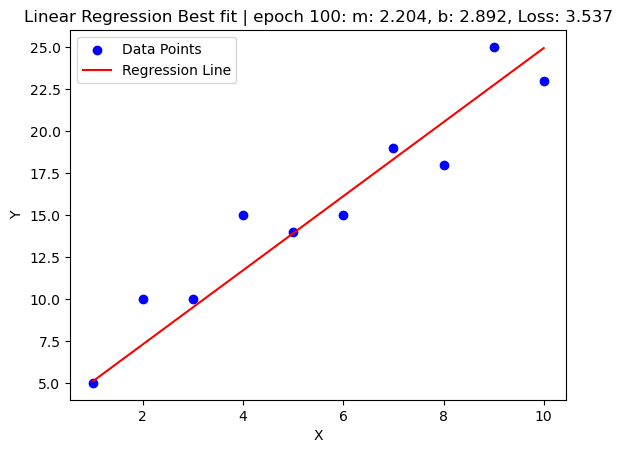



epoch 101:
beta: [2.9071107 2.2017136]
gradient: [-0.7734253  0.1111084]
loss: 3.524437713623047   |   best loss: 3.5365974426269533 => keep results, repeat process
y = X[2.9071107 2.2017136]'




epoch 102:
beta: [2.9224494 2.1995103]
gradient: [-0.7669312   0.11015625]
loss: 3.512481689453125   |   best loss: 3.524437713623047 => keep results, repeat process
y = X[2.9224494 2.1995103]'




epoch 103:
beta: [2.937659  2.1973257]
gradient: [-0.7604889   0.10922851]
loss: 3.5007247924804688   |   best loss: 3.512481689453125 => keep results, repeat process
y = X[2.937659  2.1973257]'




epoch 104:
beta: [2.952741  2.1951592]
gradient: [-0.75409853  0.1083252 ]
loss: 3.4891670227050784   |   best loss: 3.5007247924804688 => keep results, repeat process
y = X[2.952741  2.1951592]'




epoch 105:
beta: [2.9676962 2.193011 ]
gradient: [-0.74776614  0.10740967]
loss: 3.4778007507324222   |   best loss: 3.4891670227050784 => keep results, repeat process
y = X[2.9676962 2.193011 ]'




epoc

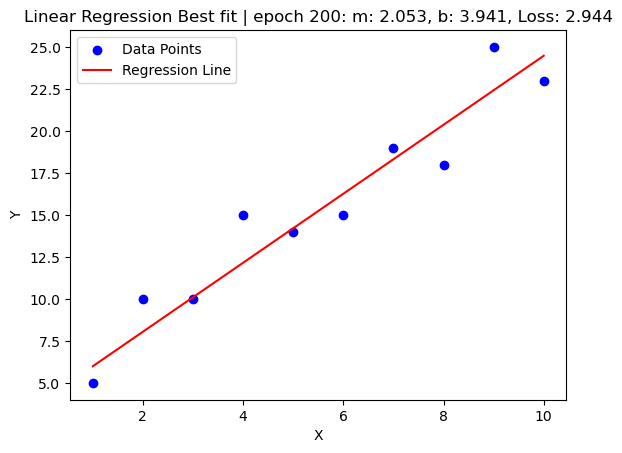



epoch 201:
beta: [3.9476526 2.0522494]
gradient: [-0.33274537  0.04780274]
loss: 2.9419883728027347   |   best loss: 2.9442390441894535 => keep results, repeat process
y = X[3.9476526 2.0522494]'




epoch 202:
beta: [3.9542515 2.0513017]
gradient: [-0.32994995  0.0473877 ]
loss: 2.9397762298583987   |   best loss: 2.9419883728027347 => keep results, repeat process
y = X[3.9542515 2.0513017]'




epoch 203:
beta: [3.9607952 2.0503619]
gradient: [-0.32717896  0.04699707]
loss: 2.937599754333496   |   best loss: 2.9397762298583987 => keep results, repeat process
y = X[3.9607952 2.0503619]'




epoch 204:
beta: [3.9672837 2.0494294]
gradient: [-0.32442933  0.04661865]
loss: 2.935460662841797   |   best loss: 2.937599754333496 => keep results, repeat process
y = X[3.9672837 2.0494294]'




epoch 205:
beta: [3.973718  2.0485055]
gradient: [-0.3217102   0.04619141]
loss: 2.9333568572998048   |   best loss: 2.935460662841797 => keep results, repeat process
y = X[3.973718  2.0485055]'




ep

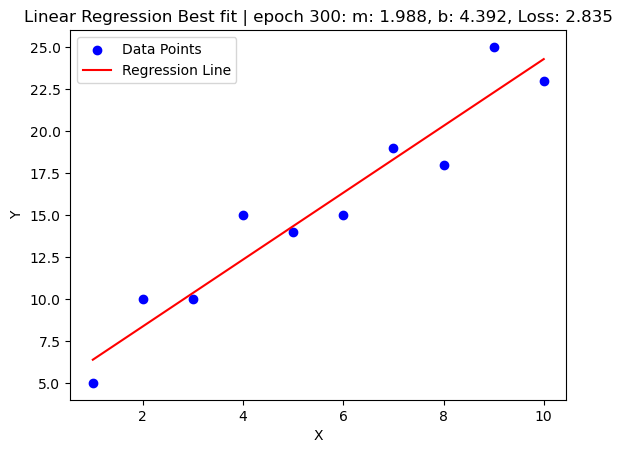



epoch 301:
beta: [4.3953176 1.9879465]
gradient: [-0.14315186  0.02056885]
loss: 2.834183502197266   |   best loss: 2.834599304199219 => keep results, repeat process
y = X[4.3953176 1.9879465]'




epoch 302:
beta: [4.3981566 1.9875388]
gradient: [-0.14195251  0.02038574]
loss: 2.8337730407714847   |   best loss: 2.834183502197266 => keep results, repeat process
y = X[4.3981566 1.9875388]'




epoch 303:
beta: [4.400972  1.9871346]
gradient: [-0.14075927  0.02021484]
loss: 2.8333705902099613   |   best loss: 2.8337730407714847 => keep results, repeat process
y = X[4.400972  1.9871346]'




epoch 304:
beta: [4.4037633 1.9867334]
gradient: [-0.1395752   0.02005615]
loss: 2.8329750061035157   |   best loss: 2.8333705902099613 => keep results, repeat process
y = X[4.4037633 1.9867334]'




epoch 305:
beta: [4.4065313 1.986336 ]
gradient: [-0.13840638  0.01987305]
loss: 2.8325847625732425   |   best loss: 2.8329750061035157 => keep results, repeat process
y = X[4.4065313 1.986336 ]'




e

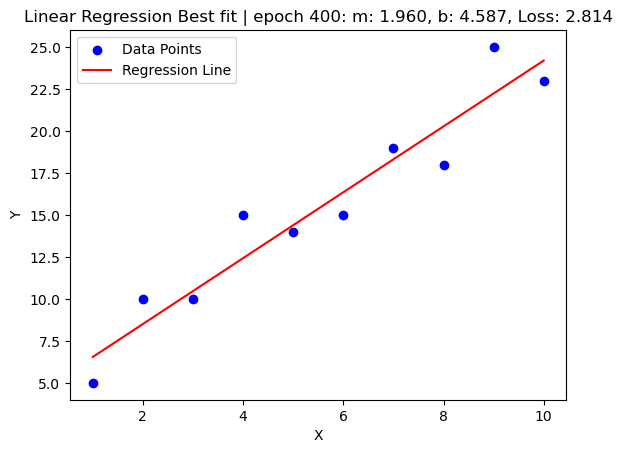



epoch 401:
beta: [4.5879126 1.9602821]
gradient: [-0.06158447  0.0088623 ]
loss: 2.814230346679688   |   best loss: 2.814305686950684 => keep results, repeat process
y = X[4.5879126 1.9602821]'




epoch 402:
beta: [4.589134  1.9601068]
gradient: [-0.06107178  0.00876465]
loss: 2.8141536712646484   |   best loss: 2.814230346679688 => keep results, repeat process
y = X[4.589134  1.9601068]'




epoch 403:
beta: [4.5903454 1.959933 ]
gradient: [-0.06055603  0.00869141]
loss: 2.8140789031982423   |   best loss: 2.8141536712646484 => keep results, repeat process
y = X[4.5903454 1.959933 ]'




epoch 404:
beta: [4.5915465 1.9597602]
gradient: [-0.06004639  0.00864258]
loss: 2.814005279541016   |   best loss: 2.8140789031982423 => keep results, repeat process
y = X[4.5915465 1.9597602]'




epoch 405:
beta: [4.5927377 1.9595892]
gradient: [-0.0595459   0.00854492]
loss: 2.8139331817626956   |   best loss: 2.814005279541016 => keep results, repeat process
y = X[4.5927377 1.9595892]'




epo

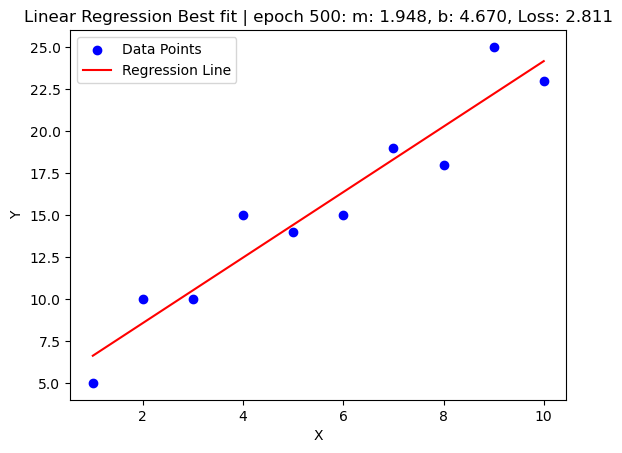



epoch 501:
beta: [4.6707706 1.9483805]
gradient: [-0.02649536  0.00380859]
loss: 2.8105363845825195   |   best loss: 2.8105504989624026 => keep results, repeat process
y = X[4.6707706 1.9483805]'




epoch 502:
beta: [4.671296 1.948305]
gradient: [-0.02627258  0.00377197]
loss: 2.810522842407227   |   best loss: 2.8105363845825195 => keep results, repeat process
y = X[4.671296 1.948305]'




epoch 503:
beta: [4.6718173 1.9482303]
gradient: [-0.02605286  0.00373535]
loss: 2.8105077743530273   |   best loss: 2.810522842407227 => keep results, repeat process
y = X[4.6718173 1.9482303]'




epoch 504:
beta: [4.672334  1.9481558]
gradient: [-0.02583313  0.00372314]
loss: 2.8104942321777346   |   best loss: 2.8105077743530273 => keep results, repeat process
y = X[4.672334  1.9481558]'




epoch 505:
beta: [4.6728463 1.9480823]
gradient: [-0.02561646  0.00367432]
loss: 2.810480880737305   |   best loss: 2.8104942321777346 => keep results, repeat process
y = X[4.6728463 1.9480823]'




epoch

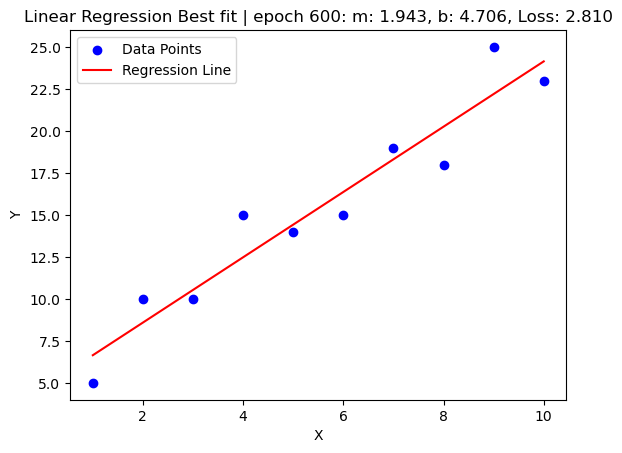



epoch 601:
beta: [4.706417  1.9432602]
gradient: [-0.01139832  0.00164795]
loss: 2.8098522186279298   |   best loss: 2.8098533630371096 => keep results, repeat process
y = X[4.706417  1.9432602]'




epoch 602:
beta: [4.706643 1.943228]
gradient: [-0.01130371  0.00161133]
loss: 2.8098510742187504   |   best loss: 2.8098522186279298 => keep results, repeat process
y = X[4.706643 1.943228]'




epoch 603:
beta: [4.706867  1.9431956]
gradient: [-0.01120606  0.00162354]
loss: 2.8098472595214847   |   best loss: 2.8098510742187504 => keep results, repeat process
y = X[4.706867  1.9431956]'




epoch 604:
beta: [4.7070894 1.9431636]
gradient: [-0.0111145   0.00159912]
loss: 2.8098457336425784   |   best loss: 2.8098472595214847 => keep results, repeat process
y = X[4.7070894 1.9431636]'




epoch 605:
beta: [4.7073097 1.9431319]
gradient: [-0.01102295  0.00158691]
loss: 2.8098419189453128   |   best loss: 2.8098457336425784 => keep results, repeat process
y = X[4.7073097 1.9431319]'




ep

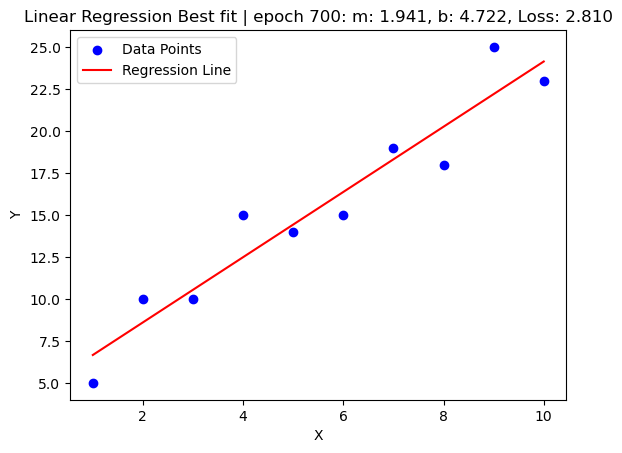



epoch 701:
beta: [4.721753  1.9410573]
gradient: [-0.00490417  0.00070801]
loss: 2.8097259521484377   |   best loss: 2.809726905822754 => keep results, repeat process
y = X[4.721753  1.9410573]'




epoch 702:
beta: [4.7218504 1.9410434]
gradient: [-0.0048645  0.0006958]
loss: 2.8097251892089847   |   best loss: 2.8097259521484377 => keep results, repeat process
y = X[4.7218504 1.9410434]'




epoch 703:
beta: [4.7219467 1.9410294]
gradient: [-0.00482178  0.0006958 ]
loss: 2.8097242355346683   |   best loss: 2.8097251892089847 => keep results, repeat process
y = X[4.7219467 1.9410294]'




epoch 705:
beta: [4.7221375 1.941002 ]
gradient: [-0.00474243  0.00068359]
loss: 2.809723472595215   |   best loss: 2.8097242355346683 => keep results, repeat process
y = X[4.7221375 1.941002 ]'




epoch 706:
beta: [4.7222314 1.9409888]
gradient: [-0.00470276  0.00065918]
loss: 2.809723281860352   |   best loss: 2.809723472595215 => keep results, repeat process
y = X[4.7222314 1.9409888]'




epoc

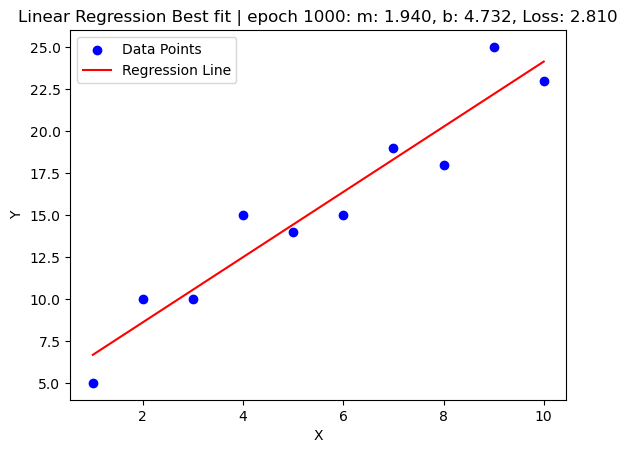

In [14]:
def predict(X: np.ndarray, beta: np.ndarray) -> np.ndarray:
    # if type(a) != np.ndarray:
    #     if type(a) == list:
    #         a = np.array(a)
    return X@beta

def calc_loss_matrix(X: np.ndarray, y: np.ndarray, beta: np.ndarray) -> float:
    return 1/len(y) * ((y-predict(X, beta)).transpose()@(y-predict(X, beta)))

def calc_gradient_matrix(X: np.ndarray, y: np.ndarray, beta: np.ndarray) -> np.ndarray:
    return 2/len(X) * (X.T@X@beta - X.T@y)

def solve(X: np.ndarray, y: np.ndarray) -> np.ndarray:
    beta = np.linalg.inv(X.T@X)@X.T@y
    return beta

def solve_svd(X: np.ndarray, y: np.ndarray) -> np.ndarray:
    U, S, Vt = np.linalg.svd(X, full_matrices=False)
    pseudo_inv = Vt.T@np.diag(S**-1)@U.T
    beta = pseudo_inv@y
    return beta

def plot_linear_regression_matrix(X: np.ndarray, y: np.ndarray, beta: np.ndarray, loss: float, epoch: int):
    # Plot the points
    plt.scatter(X[:,1], y, color="blue", label="Data Points")
    # regression_line = [m * x + b for x in x_vals]
    plt.plot(X[:,1], predict(X,beta), color="red", label="Regression Line")

    # Add labels and title
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Linear Regression Best fit | epoch {epoch}: m: {beta[1]:.3f}, b: {beta[0]:.3f}, Loss: {loss:.3f}")
    plt.legend()

    # Show the plot
    plt.show()

def regression_step_mhc(X,y,beta,best_loss,kept_results_mhc, learning_rate=None, gradient_descent=False):
    # beta_choice = np.random.choice(len(beta)
    if gradient_descent:
        if learning_rate is None:
            learning_rate = 0.01
            print(f"No learning rate defined, setting learning rate to default of {learning_rate}")
        grad = calc_gradient_matrix(X,y,beta)
        beta -= learning_rate * grad

    else:
        beta_adjust = np.random.normal(size=2)
        beta += beta_adjust
    
    new_loss = calc_loss_matrix(X, y, beta)

    if new_loss < best_loss:
        print(f"\n\nepoch {i+1}:")
        print(f"beta: {beta}")
        if gradient_descent:
            print(f"gradient: {grad}")
        print(f"loss: {new_loss}   |   best loss: {best_loss} => keep results, repeat process")
        print(f"y = X{beta}'\n\n")
        
        best_loss = new_loss
        kept_results_mhc.append((beta, new_loss, i))
        if ((i+1) % 100 == 0) or (i == 0) or (i < 20):
            plot_linear_regression_matrix(X,y,beta,new_loss,i+1)
    else:
        if not gradient_descent:
            beta -= beta_adjust

    return (beta, best_loss, kept_results_mhc)

m = 0.1
b = 0.1
best_loss = 1000000000
epochs = 1000 # 150000

X = []
y = []
beta = np.array([b,m]).astype('float32')
kept_results_mhc = [(beta, best_loss, 0)]

for point in points:
    X.append((1, point.x))
    y.append(point.y)

X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

for i in range(epochs):
    beta, best_loss, kept_results_mhc = regression_step_mhc(X,y,beta,best_loss,kept_results_mhc, 0.02, gradient_descent=True)

plot_linear_regression_matrix(X, y, beta, best_loss, epochs)

### Tensorflow



epoch 1:
beta: [0.69  3.952]
gradient: [ -29.5 -192.6]
loss: 85.59168243408203   |   best loss: 85.59168243408203 => keep results, repeat process
y = X[0.69  3.952]'




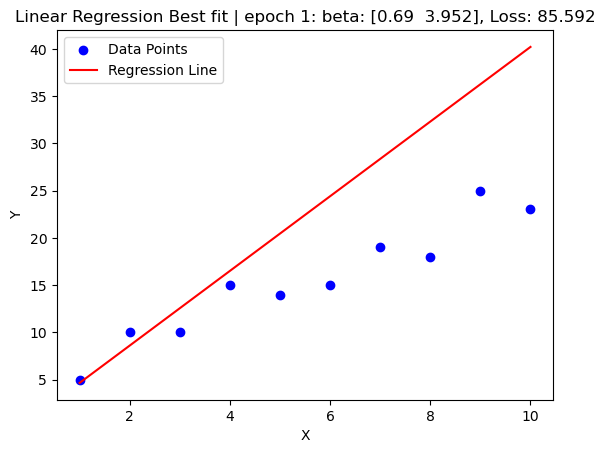



epoch 2:
beta: [0.40896 1.74212]
gradient: [ 14.051999 110.493996]
loss: 32.39215087890625   |   best loss: 32.39215087890625 => keep results, repeat process
y = X[0.40896 1.74212]'




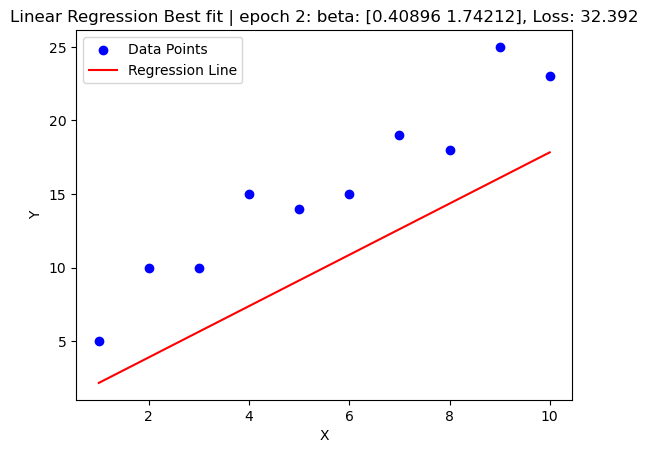



epoch 3:
beta: [0.6253352 2.997284 ]
gradient: [-10.818759 -62.758205]
loss: 14.967988967895508   |   best loss: 14.967988967895508 => keep results, repeat process
y = X[0.6253352 2.997284 ]'




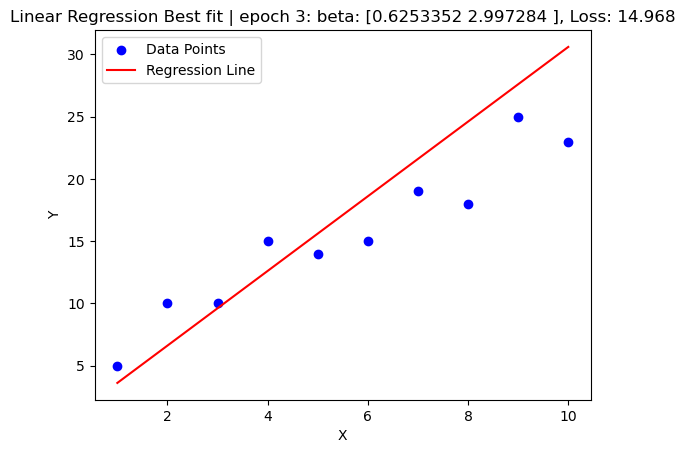



epoch 4:
beta: [0.55691934 2.2718928 ]
gradient: [ 3.4207947 36.269558 ]
loss: 9.233336448669434   |   best loss: 9.233336448669434 => keep results, repeat process
y = X[0.55691934 2.2718928 ]'




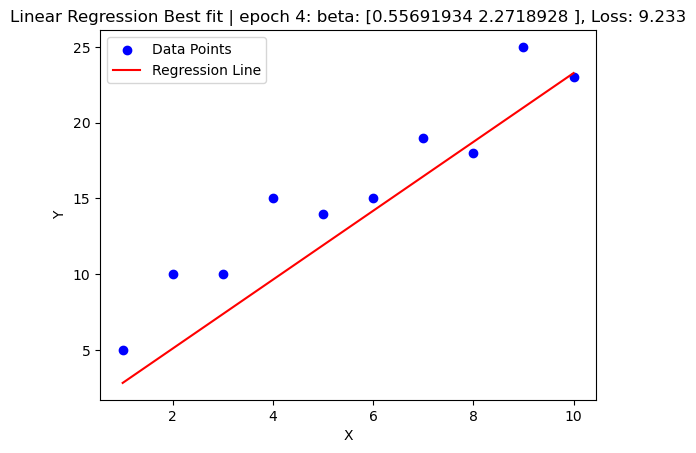



epoch 5:
beta: [0.65082616 2.6786556 ]
gradient: [ -4.69534  -20.338148]
loss: 7.31865930557251   |   best loss: 7.31865930557251 => keep results, repeat process
y = X[0.65082616 2.6786556 ]'




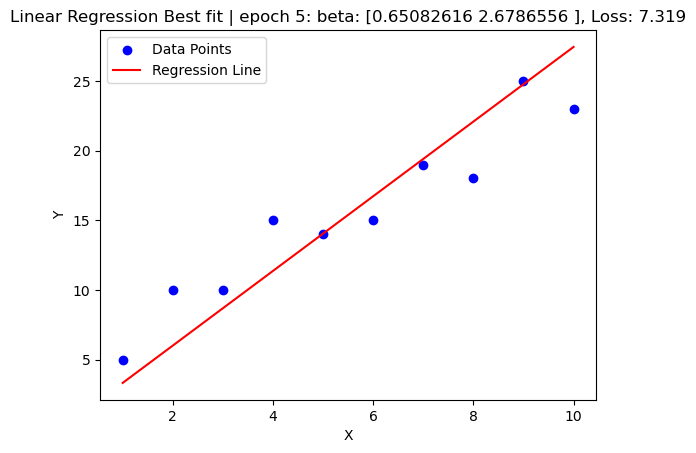



epoch 6:
beta: [0.6514889 2.438344 ]
gradient: [-0.03313599 12.015576  ]
loss: 6.652768611907959   |   best loss: 6.652768611907959 => keep results, repeat process
y = X[0.6514889 2.438344 ]'




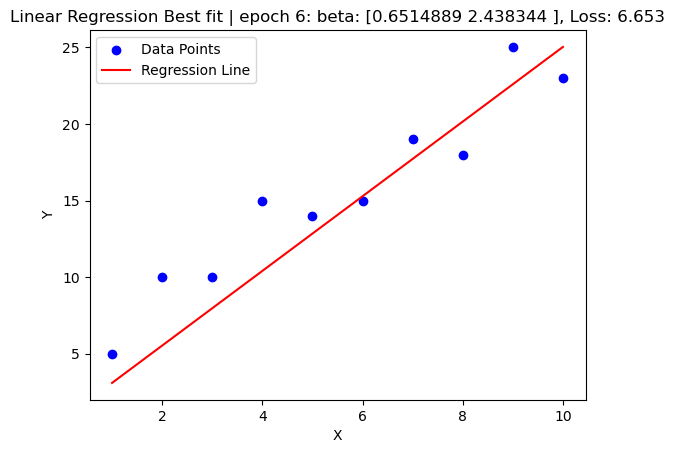



epoch 7:
beta: [0.70499367 2.5679665 ]
gradient: [-2.6752381 -6.481128 ]
loss: 6.395559310913086   |   best loss: 6.395559310913086 => keep results, repeat process
y = X[0.70499367 2.5679665 ]'




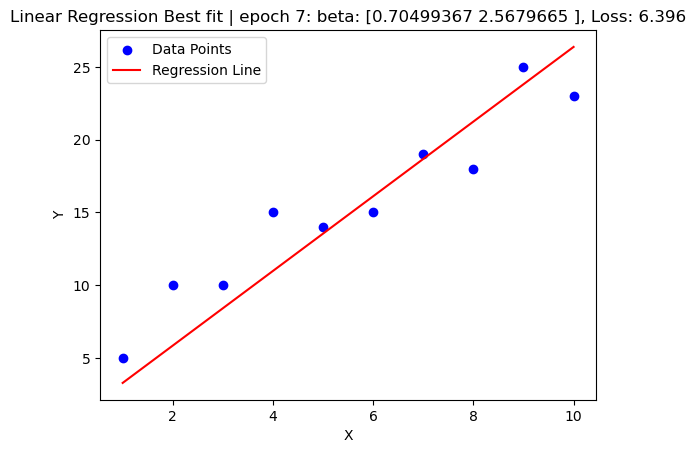



epoch 8:
beta: [0.72784126 2.4861994 ]
gradient: [-1.1423798  4.0883546]
loss: 6.272542953491211   |   best loss: 6.272542953491211 => keep results, repeat process
y = X[0.72784126 2.4861994 ]'




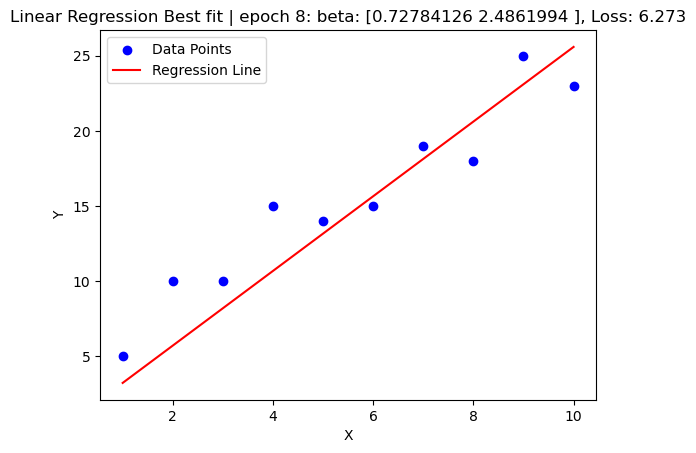



epoch 9:
beta: [0.76776373 2.5253272 ]
gradient: [-1.9961243 -1.9563965]
loss: 6.194023132324219   |   best loss: 6.194023132324219 => keep results, repeat process
y = X[0.76776373 2.5253272 ]'




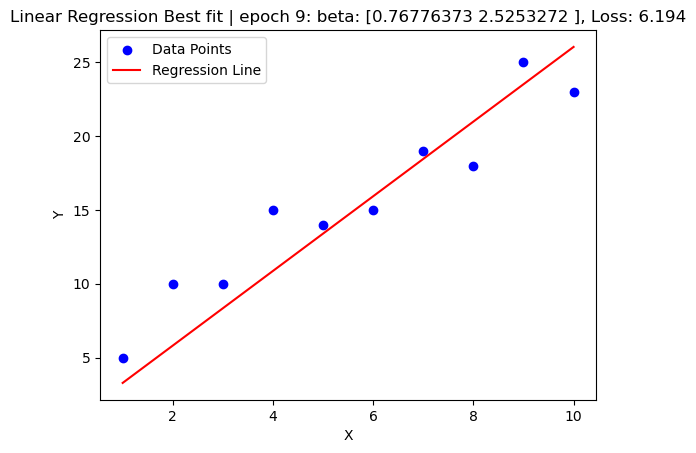



epoch 10:
beta: [0.7974812 2.4954154]
gradient: [-1.4858735  1.4955933]
loss: 6.130682945251465   |   best loss: 6.130682945251465 => keep results, repeat process
y = X[0.7974812 2.4954154]'




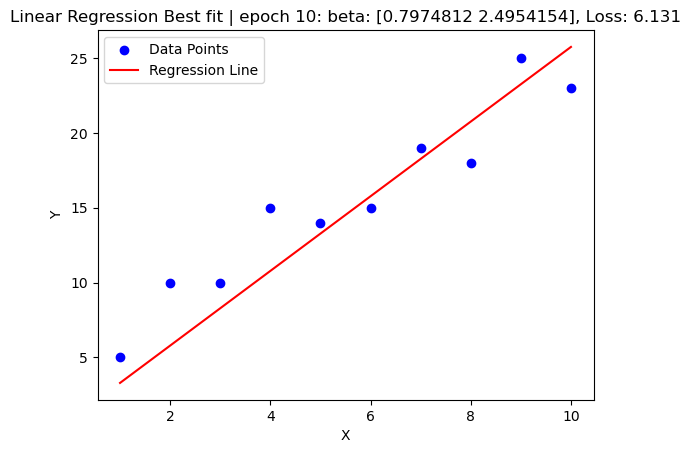



epoch 11:
beta: [0.8325906 2.50503  ]
gradient: [-1.7554687 -0.4807251]
loss: 6.072930812835693   |   best loss: 6.072930812835693 => keep results, repeat process
y = X[0.8325906 2.50503  ]'




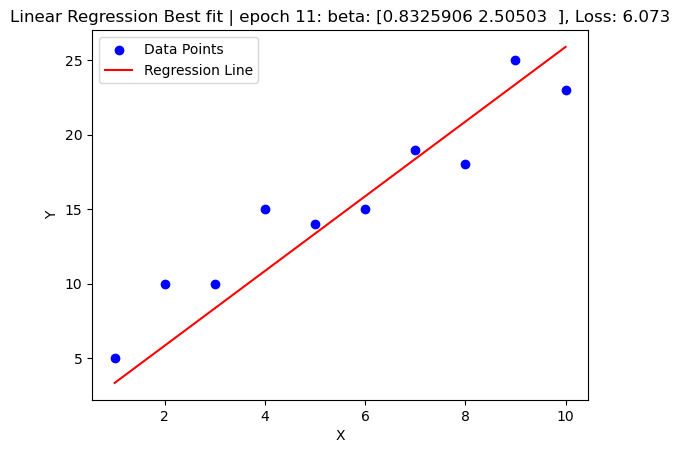



epoch 12:
beta: [0.8641804 2.4921138]
gradient: [-1.5794891   0.64580077]
loss: 6.017627716064453   |   best loss: 6.017627716064453 => keep results, repeat process
y = X[0.8641804 2.4921138]'




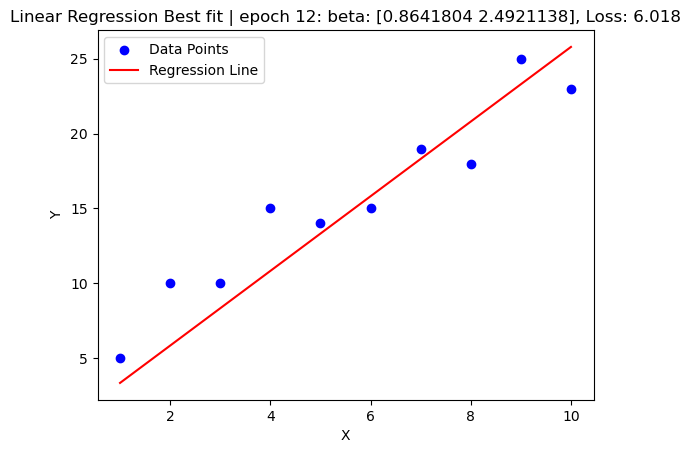



epoch 13:
beta: [0.89734817 2.4921389 ]
gradient: [-1.6583893e+00 -1.2573242e-03]
loss: 5.9637322425842285   |   best loss: 5.9637322425842285 => keep results, repeat process
y = X[0.89734817 2.4921389 ]'




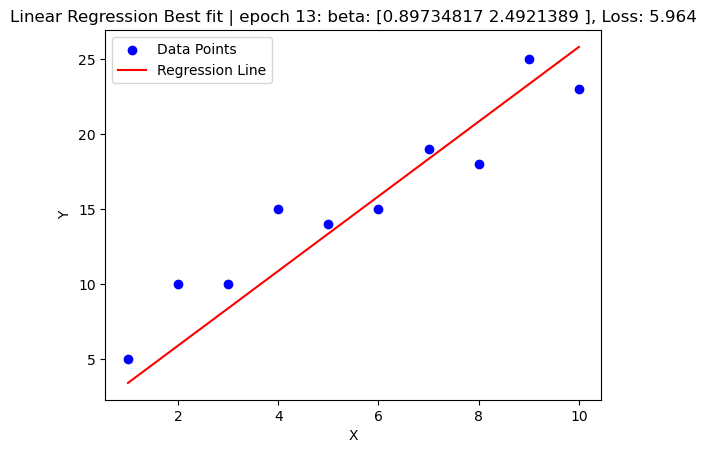



epoch 14:
beta: [0.92918366 2.4848285 ]
gradient: [-1.5917755   0.36551514]
loss: 5.9108967781066895   |   best loss: 5.9108967781066895 => keep results, repeat process
y = X[0.92918366 2.4848285 ]'




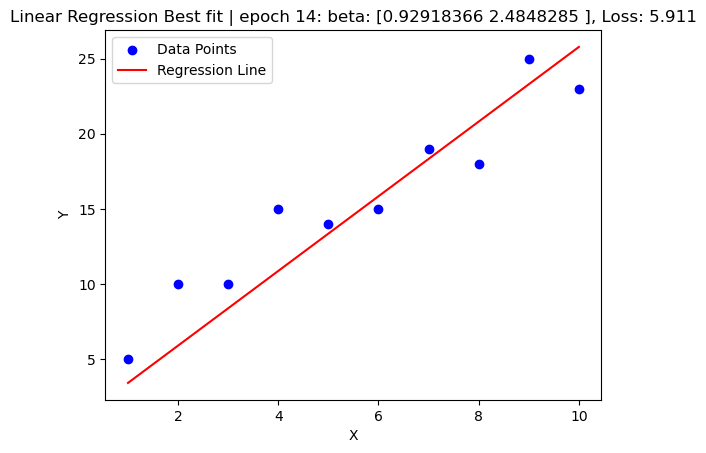



epoch 15:
beta: [0.961354  2.4817724]
gradient: [-1.6085175   0.15280762]
loss: 5.858994007110596   |   best loss: 5.858994007110596 => keep results, repeat process
y = X[0.961354  2.4817724]'




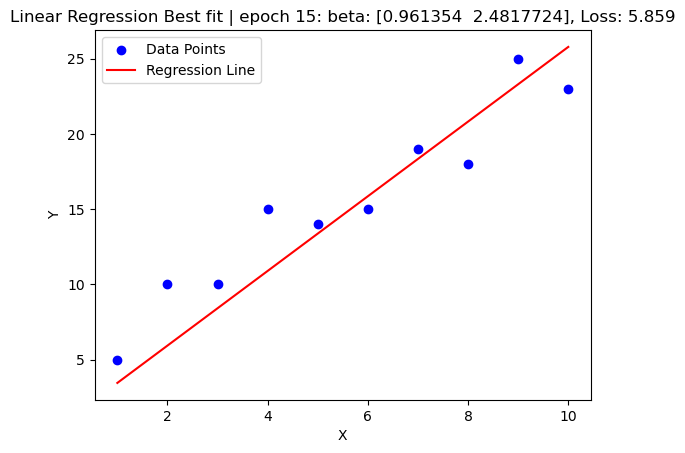



epoch 16:
beta: [0.9929099 2.476345 ]
gradient: [-1.5777954  0.2713623]
loss: 5.807979106903076   |   best loss: 5.807979106903076 => keep results, repeat process
y = X[0.9929099 2.476345 ]'




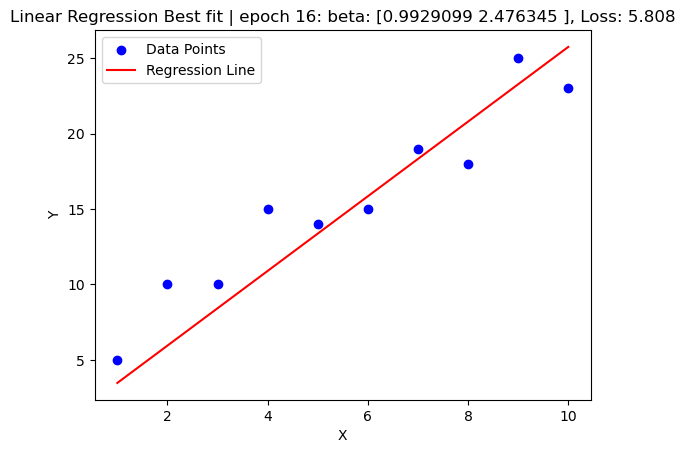



epoch 17:
beta: [1.0243976 2.4723337]
gradient: [-1.5743866   0.20057373]
loss: 5.757822513580322   |   best loss: 5.757822513580322 => keep results, repeat process
y = X[1.0243976 2.4723337]'




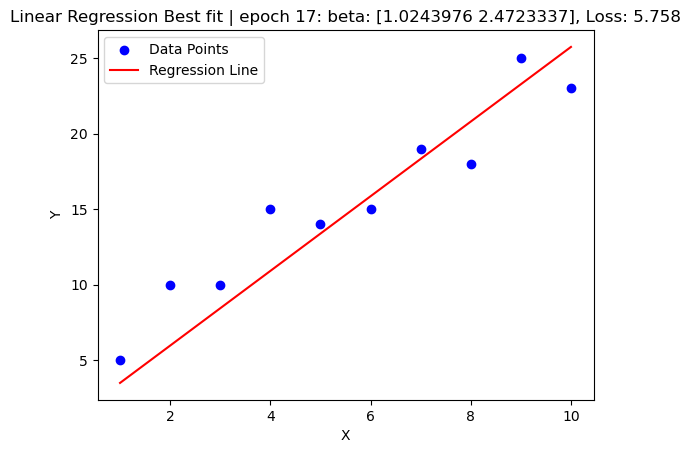



epoch 18:
beta: [1.0555084 2.4675725]
gradient: [-1.5555359   0.23806153]
loss: 5.708505630493164   |   best loss: 5.708505630493164 => keep results, repeat process
y = X[1.0555084 2.4675725]'




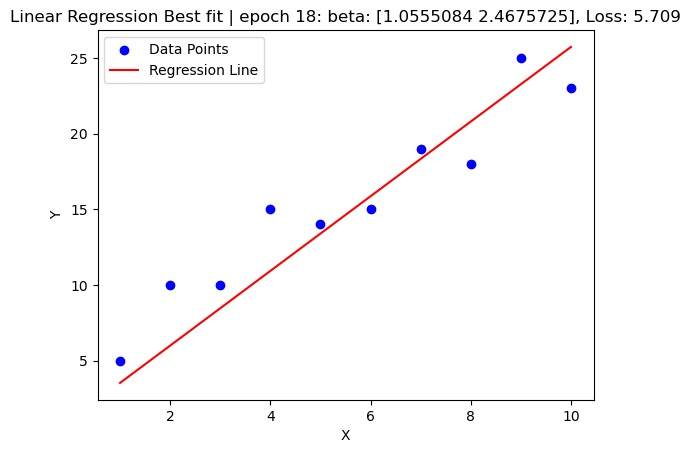



epoch 19:
beta: [1.0864221 2.463299 ]
gradient: [-1.5456848   0.21367188]
loss: 5.6600165367126465   |   best loss: 5.6600165367126465 => keep results, repeat process
y = X[1.0864221 2.463299 ]'




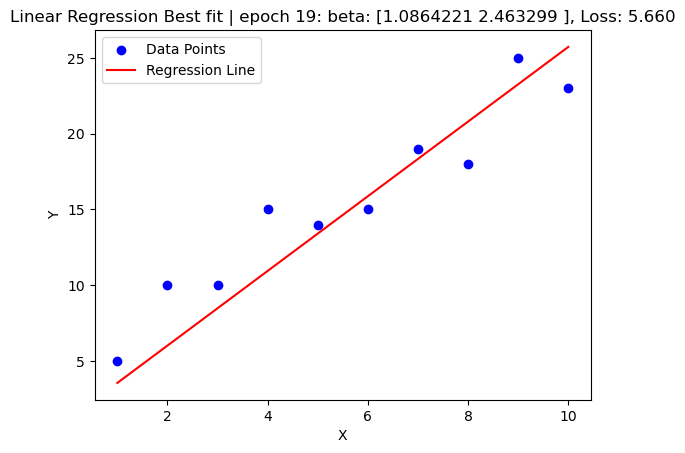



epoch 20:
beta: [1.1170394 2.4588056]
gradient: [-1.5308656   0.22467041]
loss: 5.6123366355896   |   best loss: 5.6123366355896 => keep results, repeat process
y = X[1.1170394 2.4588056]'




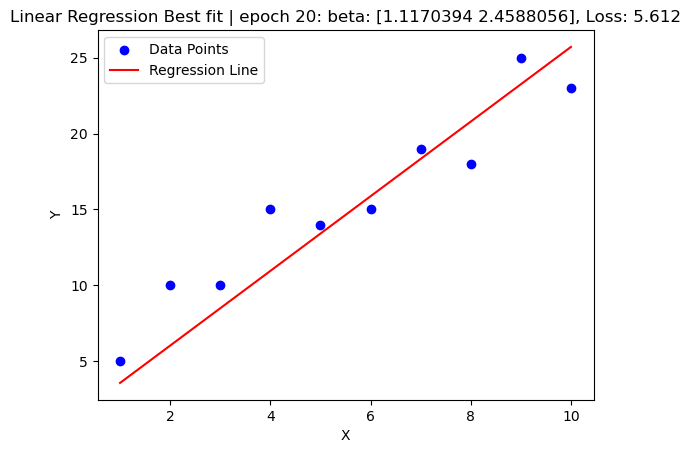



epoch 21:
beta: [1.1474206 2.4544961]
gradient: [-1.5190613  0.2154663]
loss: 5.565455913543701   |   best loss: 5.565455913543701 => keep results, repeat process
y = X[1.1474206 2.4544961]'




epoch 22:
beta: [1.1775347 2.4501395]
gradient: [-1.5057007   0.21783447]
loss: 5.519358158111572   |   best loss: 5.519358158111572 => keep results, repeat process
y = X[1.1775347 2.4501395]'




epoch 23:
beta: [1.2074026 2.445867 ]
gradient: [-1.493396    0.21362305]
loss: 5.474033832550049   |   best loss: 5.474033832550049 => keep results, repeat process
y = X[1.2074026 2.445867 ]'




epoch 24:
beta: [1.2370157 2.4416032]
gradient: [-1.4806579  0.2131958]
loss: 5.429462909698486   |   best loss: 5.429462909698486 => keep results, repeat process
y = X[1.2370157 2.4416032]'




epoch 25:
beta: [1.2663823 2.4373908]
gradient: [-1.4683319   0.21062012]
loss: 5.3856425285339355   |   best loss: 5.3856425285339355 => keep results, repeat process
y = X[1.2663823 2.4373908]'




epoch 26:
beta:

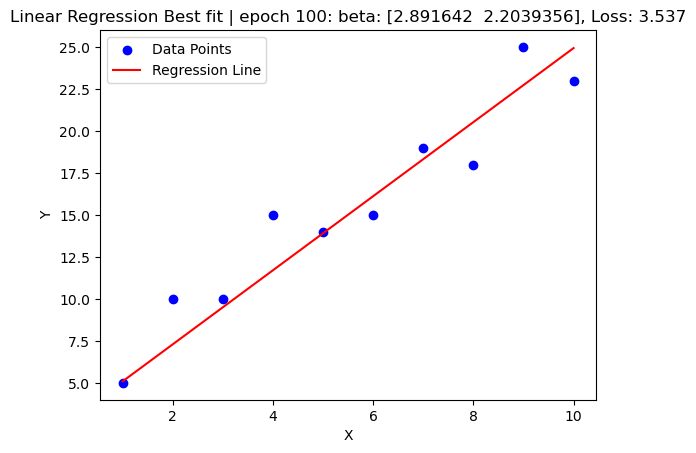



epoch 101:
beta: [2.9071107 2.2017136]
gradient: [-0.7734253  0.1111084]
loss: 3.524437665939331   |   best loss: 3.524437665939331 => keep results, repeat process
y = X[2.9071107 2.2017136]'




epoch 102:
beta: [2.9224494 2.1995103]
gradient: [-0.7669312   0.11015625]
loss: 3.512481689453125   |   best loss: 3.512481689453125 => keep results, repeat process
y = X[2.9224494 2.1995103]'




epoch 103:
beta: [2.937659  2.1973257]
gradient: [-0.7604889   0.10922851]
loss: 3.5007247924804688   |   best loss: 3.5007247924804688 => keep results, repeat process
y = X[2.937659  2.1973257]'




epoch 104:
beta: [2.952741  2.1951592]
gradient: [-0.75409853  0.1083252 ]
loss: 3.4891669750213623   |   best loss: 3.4891669750213623 => keep results, repeat process
y = X[2.952741  2.1951592]'




epoch 105:
beta: [2.9676962 2.193011 ]
gradient: [-0.74776614  0.10740967]
loss: 3.4778008460998535   |   best loss: 3.4778008460998535 => keep results, repeat process
y = X[2.9676962 2.193011 ]'




epoc

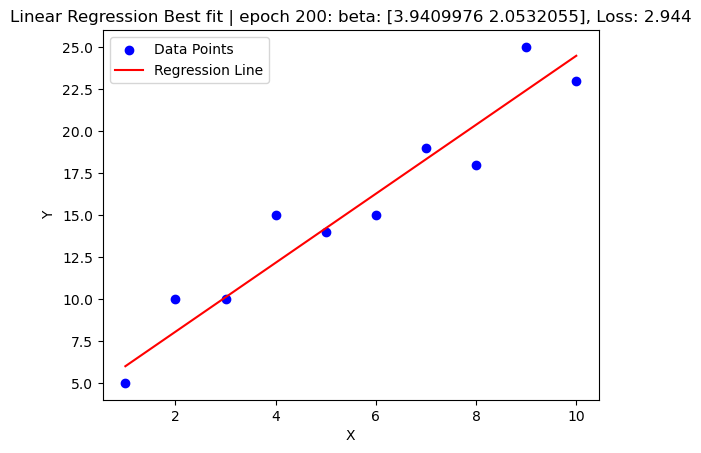



epoch 201:
beta: [3.9476526 2.0522494]
gradient: [-0.33274537  0.04780274]
loss: 2.941988706588745   |   best loss: 2.941988706588745 => keep results, repeat process
y = X[3.9476526 2.0522494]'




epoch 202:
beta: [3.9542515 2.0513017]
gradient: [-0.32994995  0.0473877 ]
loss: 2.9397761821746826   |   best loss: 2.9397761821746826 => keep results, repeat process
y = X[3.9542515 2.0513017]'




epoch 203:
beta: [3.9607952 2.0503619]
gradient: [-0.32717896  0.04699707]
loss: 2.9375998973846436   |   best loss: 2.9375998973846436 => keep results, repeat process
y = X[3.9607952 2.0503619]'




epoch 204:
beta: [3.9672837 2.0494294]
gradient: [-0.32442933  0.04661865]
loss: 2.9354605674743652   |   best loss: 2.9354605674743652 => keep results, repeat process
y = X[3.9672837 2.0494294]'




epoch 205:
beta: [3.973718  2.0485055]
gradient: [-0.3217102   0.04619141]
loss: 2.933357000350952   |   best loss: 2.933357000350952 => keep results, repeat process
y = X[3.973718  2.0485055]'




ep

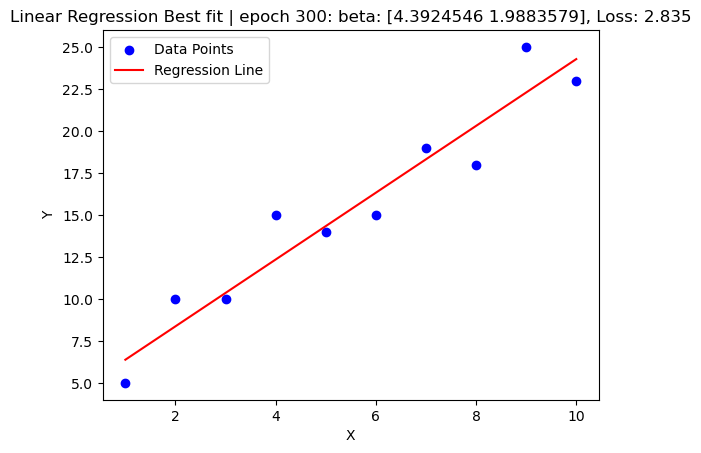



epoch 301:
beta: [4.3953176 1.9879465]
gradient: [-0.14315186  0.02056885]
loss: 2.83418345451355   |   best loss: 2.83418345451355 => keep results, repeat process
y = X[4.3953176 1.9879465]'




epoch 302:
beta: [4.3981566 1.9875388]
gradient: [-0.14195251  0.02038574]
loss: 2.833773374557495   |   best loss: 2.833773374557495 => keep results, repeat process
y = X[4.3981566 1.9875388]'




epoch 303:
beta: [4.400972  1.9871346]
gradient: [-0.14075927  0.02021484]
loss: 2.8333706855773926   |   best loss: 2.8333706855773926 => keep results, repeat process
y = X[4.400972  1.9871346]'




epoch 304:
beta: [4.4037633 1.9867334]
gradient: [-0.1395752   0.02005615]
loss: 2.832975149154663   |   best loss: 2.832975149154663 => keep results, repeat process
y = X[4.4037633 1.9867334]'




epoch 305:
beta: [4.4065313 1.986336 ]
gradient: [-0.13840638  0.01987305]
loss: 2.8325846195220947   |   best loss: 2.8325846195220947 => keep results, repeat process
y = X[4.4065313 1.986336 ]'




epoch 

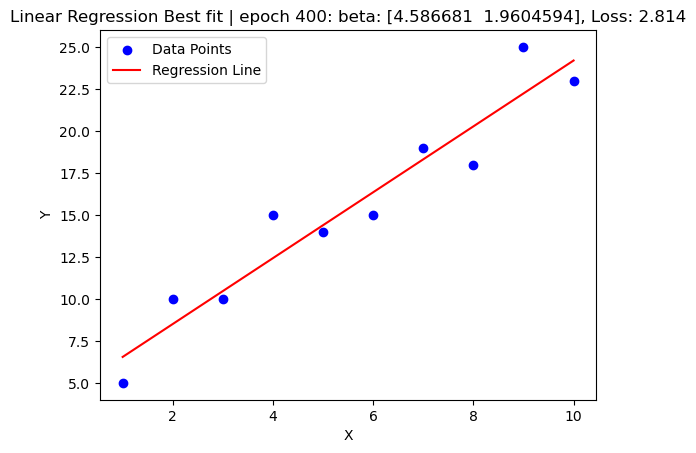



epoch 401:
beta: [4.5879126 1.9602821]
gradient: [-0.06158447  0.0088623 ]
loss: 2.814229965209961   |   best loss: 2.814229965209961 => keep results, repeat process
y = X[4.5879126 1.9602821]'




epoch 402:
beta: [4.589134  1.9601068]
gradient: [-0.06107178  0.00876465]
loss: 2.8141534328460693   |   best loss: 2.8141534328460693 => keep results, repeat process
y = X[4.589134  1.9601068]'




epoch 403:
beta: [4.5903454 1.959933 ]
gradient: [-0.06055603  0.00869141]
loss: 2.8140790462493896   |   best loss: 2.8140790462493896 => keep results, repeat process
y = X[4.5903454 1.959933 ]'




epoch 404:
beta: [4.5915465 1.9597602]
gradient: [-0.06004639  0.00864258]
loss: 2.8140053749084473   |   best loss: 2.8140053749084473 => keep results, repeat process
y = X[4.5915465 1.9597602]'




epoch 405:
beta: [4.5927377 1.9595892]
gradient: [-0.0595459   0.00854492]
loss: 2.8139331340789795   |   best loss: 2.8139331340789795 => keep results, repeat process
y = X[4.5927377 1.9595892]'






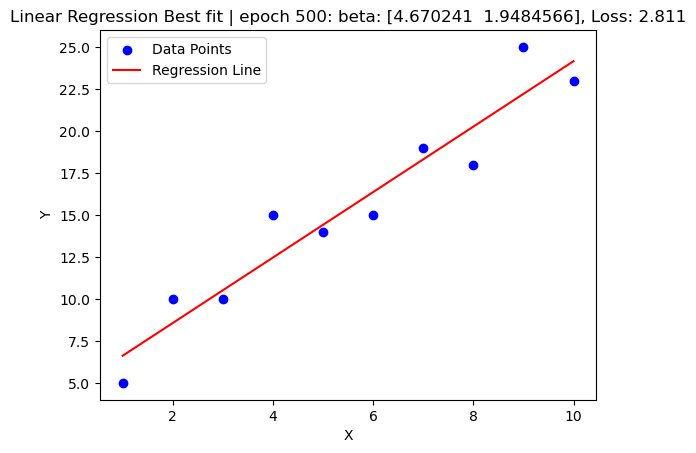



epoch 501:
beta: [4.6707706 1.9483805]
gradient: [-0.02649536  0.00380859]
loss: 2.8105366230010986   |   best loss: 2.8105366230010986 => keep results, repeat process
y = X[4.6707706 1.9483805]'




epoch 502:
beta: [4.671296 1.948305]
gradient: [-0.02627258  0.00377197]
loss: 2.8105227947235107   |   best loss: 2.8105227947235107 => keep results, repeat process
y = X[4.671296 1.948305]'




epoch 503:
beta: [4.6718173 1.9482303]
gradient: [-0.02605286  0.00373535]
loss: 2.8105077743530273   |   best loss: 2.8105077743530273 => keep results, repeat process
y = X[4.6718173 1.9482303]'




epoch 504:
beta: [4.672334  1.9481558]
gradient: [-0.02583313  0.00372314]
loss: 2.8104944229125977   |   best loss: 2.8104944229125977 => keep results, repeat process
y = X[4.672334  1.9481558]'




epoch 505:
beta: [4.6728463 1.9480823]
gradient: [-0.02561646  0.00367432]
loss: 2.810481309890747   |   best loss: 2.810481309890747 => keep results, repeat process
y = X[4.6728463 1.9480823]'




epoc

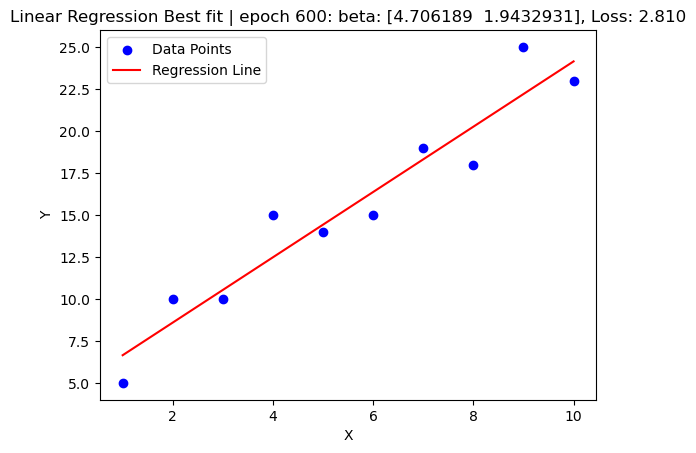



epoch 601:
beta: [4.706417  1.9432602]
gradient: [-0.01139832  0.00164795]
loss: 2.809852361679077   |   best loss: 2.809852361679077 => keep results, repeat process
y = X[4.706417  1.9432602]'




epoch 602:
beta: [4.706643 1.943228]
gradient: [-0.01130371  0.00161133]
loss: 2.8098514080047607   |   best loss: 2.8098514080047607 => keep results, repeat process
y = X[4.706643 1.943228]'




epoch 603:
beta: [4.706867  1.9431956]
gradient: [-0.01120606  0.00162354]
loss: 2.809847593307495   |   best loss: 2.809847593307495 => keep results, repeat process
y = X[4.706867  1.9431956]'




epoch 604:
beta: [4.7070894 1.9431636]
gradient: [-0.0111145   0.00159912]
loss: 2.8098456859588623   |   best loss: 2.8098456859588623 => keep results, repeat process
y = X[4.7070894 1.9431636]'




epoch 605:
beta: [4.7073097 1.9431319]
gradient: [-0.01102295  0.00158691]
loss: 2.8098418712615967   |   best loss: 2.8098418712615967 => keep results, repeat process
y = X[4.7073097 1.9431319]'




epoch 

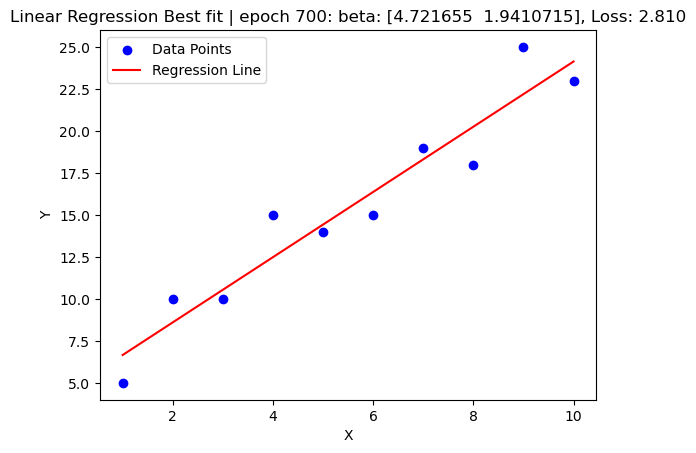



epoch 701:
beta: [4.721753  1.9410573]
gradient: [-0.00490417  0.00070801]
loss: 2.8097262382507324   |   best loss: 2.8097262382507324 => keep results, repeat process
y = X[4.721753  1.9410573]'




epoch 702:
beta: [4.7218504 1.9410434]
gradient: [-0.0048645  0.0006958]
loss: 2.809725522994995   |   best loss: 2.809725522994995 => keep results, repeat process
y = X[4.7218504 1.9410434]'




epoch 703:
beta: [4.7219467 1.9410294]
gradient: [-0.00482178  0.0006958 ]
loss: 2.8097243309020996   |   best loss: 2.8097243309020996 => keep results, repeat process
y = X[4.7219467 1.9410294]'




epoch 705:
beta: [4.7221375 1.941002 ]
gradient: [-0.00474243  0.00068359]
loss: 2.809723377227783   |   best loss: 2.809723377227783 => keep results, repeat process
y = X[4.7221375 1.941002 ]'




epoch 708:
beta: [4.7224174 1.9409618]
gradient: [-0.00462341  0.00065918]
loss: 2.809722423553467   |   best loss: 2.809722423553467 => keep results, repeat process
y = X[4.7224174 1.9409618]'




epoch 

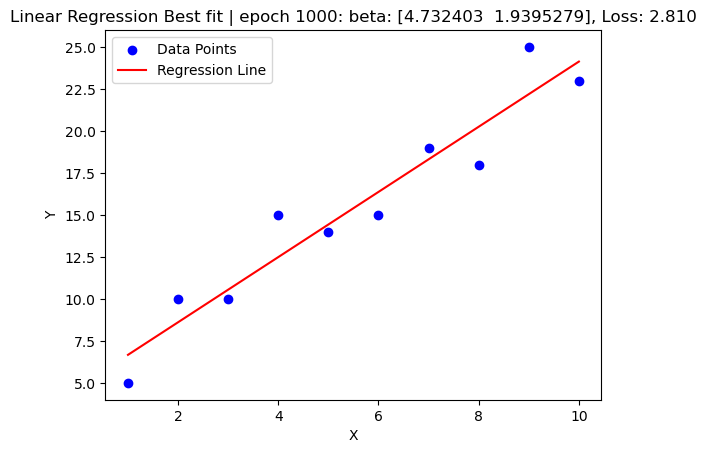

Best solution: beta: [4.732403  1.9395279] with a loss of 2.8096959590911865
Best solution by solver: beta: [4.73333  1.939394] with a loss of 2.809696912765503


In [ ]:
import tensorflow as tf

def predict_tf(X: tf.Tensor, beta: tf.Tensor) -> tf.Tensor:
    return X @ beta

def calc_loss_tf(X: tf.Tensor, y: tf.Tensor, beta: tf.Tensor) -> float:
    epsilon = y-predict_tf(X,beta)
    return 1/len(X) * (tf.transpose(epsilon)@epsilon)

def calc_gradient_tf(X: tf.Tensor, y: tf.Tensor, beta: tf.Tensor) -> tf.Tensor:
    return 2/len(X) * (tf.transpose(X)@X@beta - tf.transpose(X)@y)

def solve_tf(X: tf.Tensor, y: tf.Tensor) -> tf.Tensor:
    return tf.linalg.inv(tf.transpose(X)@X)@tf.transpose(X)@y

def plot_linear_regression_tf(X: tf.Tensor, y: tf.Tensor, beta: tf.Tensor, loss: float, epoch: int):
    # Plot the points
    plt.scatter(X[:,1], y, color="blue", label="Data Points")
    # regression_line = [m * x + b for x in x_vals]
    plt.plot(X[:,1], predict(X,beta), color="red", label="Regression Line")

    # Add labels and title
    plt.xlabel("X")
    plt.ylabel("Y")
    # beta_tensor[0].numpy()[0]
    # print(f"epoch: {epoch} beta[0]: {beta[0].numpy()[0]}, beta[1]: {beta[1].numpy()[0]:.3f}, Loss: {loss}")
    # plt.title(f"Linear Regression Best fit | epoch {epoch}: b0: {beta[0].numpy()[0]:.3f}, b1: {beta[1].numpy()[0]:.3f}, Loss: {loss:.3f}")
    plt.title(f"Linear Regression Best fit | epoch {epoch}: beta: {beta.numpy()[:,0]}, Loss: {loss:.3f}")
    plt.legend()
    plt.show()

def regression_step_tf(X,y,beta,best_loss,kept_results_mhc, learning_rate=None, use_gradient_descent=False, intermediate_steps_verbose=False):
    # beta_choice = np.random.choice(len(beta)
    if use_gradient_descent:
        if learning_rate is None:
            learning_rate = 0.01
            print(f"No learning rate defined, setting learning rate to default of {learning_rate}")
        grad = calc_gradient_tf(X,y,beta)
        beta -= learning_rate * grad

    else:
        beta_adjust = tf.random.normal((2,1))
        beta += beta_adjust
    
    new_loss = calc_loss_tf(X,y,beta).numpy()[0][0]

    if new_loss < best_loss:
        best_loss = new_loss
        kept_results_mhc.append((beta, new_loss, i))

        if intermediate_steps_verbose:
            print(f"\n\nepoch {i+1}:")
            print(f"beta: {beta.numpy()[:,0]}")
            if use_gradient_descent:
                print(f"gradient: {grad.numpy()[:,0]}")
            print(f"loss: {new_loss}   |   best loss: {best_loss} => keep results, repeat process")
            print(f"y = X{beta.numpy()[:,0]}'\n\n")
            
            if use_gradient_descent:
                if ((i+1) % 100 == 0) or (i == 0) or (i < 20):
                    plot_linear_regression_tf(X,y,beta,new_loss,i+1)
            else:
                plot_linear_regression_tf(X,y,beta,new_loss,i+1)
    else:
        if not use_gradient_descent:
            beta -= beta_adjust

    return (beta, best_loss, kept_results_mhc)

m = 0.1
b = 0.1
best_loss = 1000000000
epochs = 1000 # 150000
learning_rate = 0.02

X = []
y = []
beta = np.array([b,m]).astype('float32')
kept_results_tf = [(beta, best_loss, 0)]

for point in points:
    X.append((1, point.x))
    y.append(point.y)

X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

X_tensor = tf.convert_to_tensor(X)
y_tensor = tf.convert_to_tensor(y.reshape([-1,1]))
beta_tensor = tf.convert_to_tensor(beta.reshape([-1,1]))

for i in range(epochs):
    if (i+1) % 100 == 0:
        print(f"{i+1}/{epochs}")
    beta_tensor, best_loss, kept_results_tf = regression_step_tf(X_tensor, y_tensor, beta_tensor, best_loss, kept_results_tf, learning_rate, 
                                                                 use_gradient_descent=True, intermediate_steps_verbose=True)

plot_linear_regression_tf(X_tensor, y_tensor, beta_tensor, best_loss, epochs)

beta_solved = solve_tf(X_tensor, y_tensor)

print(f"Best solution: beta: {beta_tensor.numpy()[:,0]} with a loss of {best_loss}")
print(f"Best solution by solver: beta: {beta_solved.numpy()[:,0]} with a loss of {calc_loss_tf(X_tensor, y_tensor, beta_solved).numpy()[0][0]}")